<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/MVP/Vers%C3%A3o2_de_Projeto_Split1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aluna : Lucia Helena Barros dos Santos

# Descrição do Problema: 

# Objetivo: 

 
## Dicionário de dados:

##### - **Identificacao:** Chave de identificação do registro no banco original
##### - **Data:** Data e horário de medição do poluente pela estação
##### - **Estacao:** Sigla da estação meteorológica Irajá (IR)

---

#### *Poluentes medidos pela Estação meteorológica IR*
##### - **Chuva:** Volume de Chuva medida em milímetro (mm)
##### - **RS:** Radiação Solar medida em milímetro (mm)
##### - **Temp:** Temperatura medida em graus Celcius (°C)
##### - **UR:** Umidade Relativa medida em percentual (%)
##### - **Dir_Vento:** Direção do Vento medido em graus (°)
##### - **Vel_Vento:** Umidade Relativa medida em percentual (%)
##### - **SO2:** Dióxido de Exofre medido em Micrograma por Metro Cúbico (µg/m3) 
##### - **NO2:** Dióxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **HCT:** Hidrocarboneto Total medido em partes por milhão (ppm)
##### - **CH4:** Metano medido em partes por milhão (ppm)
##### - **CO:** Monóxido de Carbono Metano medido em partes por milhão (ppm)
##### - **NO:** Monóxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **NOx:** Óxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **O3:** Ozônio medido Micrograma medido em Metro Cúbico (µg/m3) 
##### - **PM10:** Material Particulado <10 medido em Metro Cúbico (µg/m3)
##### - **PM2_5:** Material Particulado <2_5 medido em Metro Cúbico (µg/m3)


## Importando bibliotecas 

In [1]:
# Importação brbliotecas necessárias

import pandas as pd
import numpy as np
import os # para o retorno do caminho dos dados - 'os.chdir'
import datetime # para o tratamento de datas
import missingno as ms # para tratamento de valores faltantes "missing"
import missingno as msno # para tratamento de valores faltantes "missing"
import matplotlib.pyplot as plt # biblioteca para criação de gráficos
import plotly.graph_objects as go
import seaborn as sns # biblioteca para criação de gráficos
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler # biblioteca para normalização
from sklearn.preprocessing import StandardScaler # biblioteca para padronização
from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
from google.colab import data_table # para melhor apresentação da tabela
from datetime import date, datetime # para conversão de datas

## Criando Funções

In [2]:
# Função que cria variável "estacao_ano" para identificar as estações climáticas

def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month
 
  if vmes in (1,2):
    return "Verao"
  elif vmes == 3:
    if vdia < 21:
      return "Verao"
    else:
      return "Outono" 
  elif vmes in (4,5):    
      return "Outono"
  elif vmes == 6:
      if vdia < 21:
        return "Outono" 
      else:    
        return "Inverno"
  elif vmes in (7,8):
      return "Inverno"
  elif vmes == 9:
      if vdia < 21:
        return "Inverno"  
      else:    
        return "Primavera" 
  elif vmes in (10,11):
      return "Primavera"
  elif vmes == 12:    
      if vdia < 21:
        return "Primavera"  
      else:    
        return "Verao" 


# Função que cria variável "periodo_dia" para identificar manhã, tarde ou noite

def calcula_periodo_dia(hora):
  vhora = hora

  if vhora < 12:
    return "Manhã"
  if vhora < 18:
    return "Tarde"  
  else: 
    return "Noite"

# ***1 - Etapa de Análise Exploratória dos dados***

## 1.1 - Carregando do Banco de dados

In [14]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [15]:
# Importando o arquivo em formato csv hospedado em My Drive

dadoarIR = pd.read_csv('dados/EstacaoIR20122021.csv', delimiter = ';')

In [16]:
# Verificando que o banco é um Dataframe

type(dadoarIR)

pandas.core.frame.DataFrame

In [17]:
# Verificando a estrutura do Datatrame observo que o atributo Data está em 
# formato str, necessitnado assim de um transformação de formato str para date

dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Identificacao  79863 non-null  int64  
 1   Data           79863 non-null  object 
 2   Estacao        79863 non-null  object 
 3   Chuva          79394 non-null  float64
 4   RS             68397 non-null  float64
 5   Temp           69942 non-null  float64
 6   UR             63458 non-null  float64
 7   Dir_Vento      66399 non-null  float64
 8   Vel_Vento      66401 non-null  float64
 9   SO2            63167 non-null  float64
 10  NO2            73931 non-null  float64
 11  HCNM           67060 non-null  float64
 12  HCT            66986 non-null  float64
 13  CH4            67061 non-null  float64
 14  CO             72352 non-null  float64
 15  NO             73918 non-null  float64
 16  NOx            73927 non-null  float64
 17  O3             73722 non-null  float64
 18  PM10  

In [18]:
# Observando as 5 primeiras linhas do Dataframe

dadoarIR.head()

,Identificacao,Data,Estacao,Chuva,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
0,223917,2012/01/01 00:30:00+00,IR,0.8,0.83,24.84,97.12,NaN,NaN,2.55,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0
1,223918,2012/01/01 01:30:00+00,IR,0.0,1.00,24.68,96.00,NaN,NaN,0.45,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0
2,223919,2012/01/01 02:30:00+00,IR,0.0,1.00,24.56,96.39,NaN,NaN,0.11,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0
3,223920,2012/01/01 03:30:00+00,IR,0.0,1.00,24.65,96.87,NaN,NaN,0.70,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0
4,223921,2012/01/01 04:30:00+00,IR,0.0,1.00,24.66,96.32,NaN,NaN,0.79,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0


In [19]:
# Renomeando os atributos com nome abreviado

dadoarIR.rename(columns = {'Temp' :'Temperatura', 'RS' :'Radiacao_Solar',
                           'UR' : 'Umidade_Relativa', 'Dir_Vento' : 'Direcao_Vento',
                           'Vel_Vento' : 'Velocidade_Vento'}, inplace = True);

## 1.2 - Análse descritiva dos dados

Nesta etapa criamos o dataset dadoarIR_Medidas, onde temos apenas os atributos correspondentes às medições dos poluentes, de formato numérico retirando os atributos categóricos. Este dataset será utilizado em tabelas com cálculos estatíticos e para a construção de gráficos, 

In [20]:
# Selecionando apenas os atributos que representam medição da estação

dadoarIR_Medidas = dadoarIR[['Chuva','Radiacao_Solar','Temperatura','Umidade_Relativa','Direcao_Vento',
                             'Velocidade_Vento','SO2','NO2','HCNM','HCT','CH4',
                             'CO','NO','NOx','O3','PM10','PM2_5']]

In [21]:
# Faz um resumo estatístico do dataset dadoarIR_Medidas (média, desvio padrão, mínimo, máximo e os quartis)

dadoarIR_Medidas.describe()

,Chuva,Radiacao_Solar,Temperatura,Umidade_Relativa,Direcao_Vento,Velocidade_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
count,79394.000000,68397.000000,69942.000000,63458.000000,66399.000000,66401.000000,63167.000000,73931.000000,67060.000000,66986.000000,67061.000000,72352.000000,73918.000000,73927.000000,73722.000000,76108.000000,71421.000000
mean,0.134650,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.448970,18.413329,58.099434,35.123128,37.263661,17.317909
std,1.218307,263.120389,4.865654,18.957895,82.200564,0.754830,6.849701,20.668641,0.129975,0.479669,0.399875,0.290624,34.183769,47.335670,33.879136,23.913806,14.699718
min,0.000000,0.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.880000,54.550000,83.500000,0.680000,0.580000,24.990000,0.060000,1.940000,1.860000,0.280000,3.220000,29.740000,9.150000,22.000000,8.000000
50%,0.000000,5.830000,26.750000,70.095000,150.830000,0.980000,2.510000,36.320000,0.100000,2.090000,1.980000,0.390000,7.140000,44.930000,26.320000,32.000000,13.000000
75%,0.000000,283.000000,30.370000,82.730000,226.830000,1.450000,5.150000,50.150000,0.160000,2.320000,2.170000,0.540000,17.840000,70.330000,50.490000,47.000000,23.000000
max,88.000000,1752.670000,45.650000,100.000000,358.830000,6.480000,309.130000,211.810000,7.530000,13.010000,12.730000,4.620000,640.380000,702.670000,355.450000,409.000000,370.000000


Nesta etapa com o banco de dados sem nenhum tratamento ou ajuste, construímos alguns gráficos, como Histogramas, Gráfico de Densidade e Bbox-Plot que nos permitão conhecer o comportamento individual de cada poluente. 

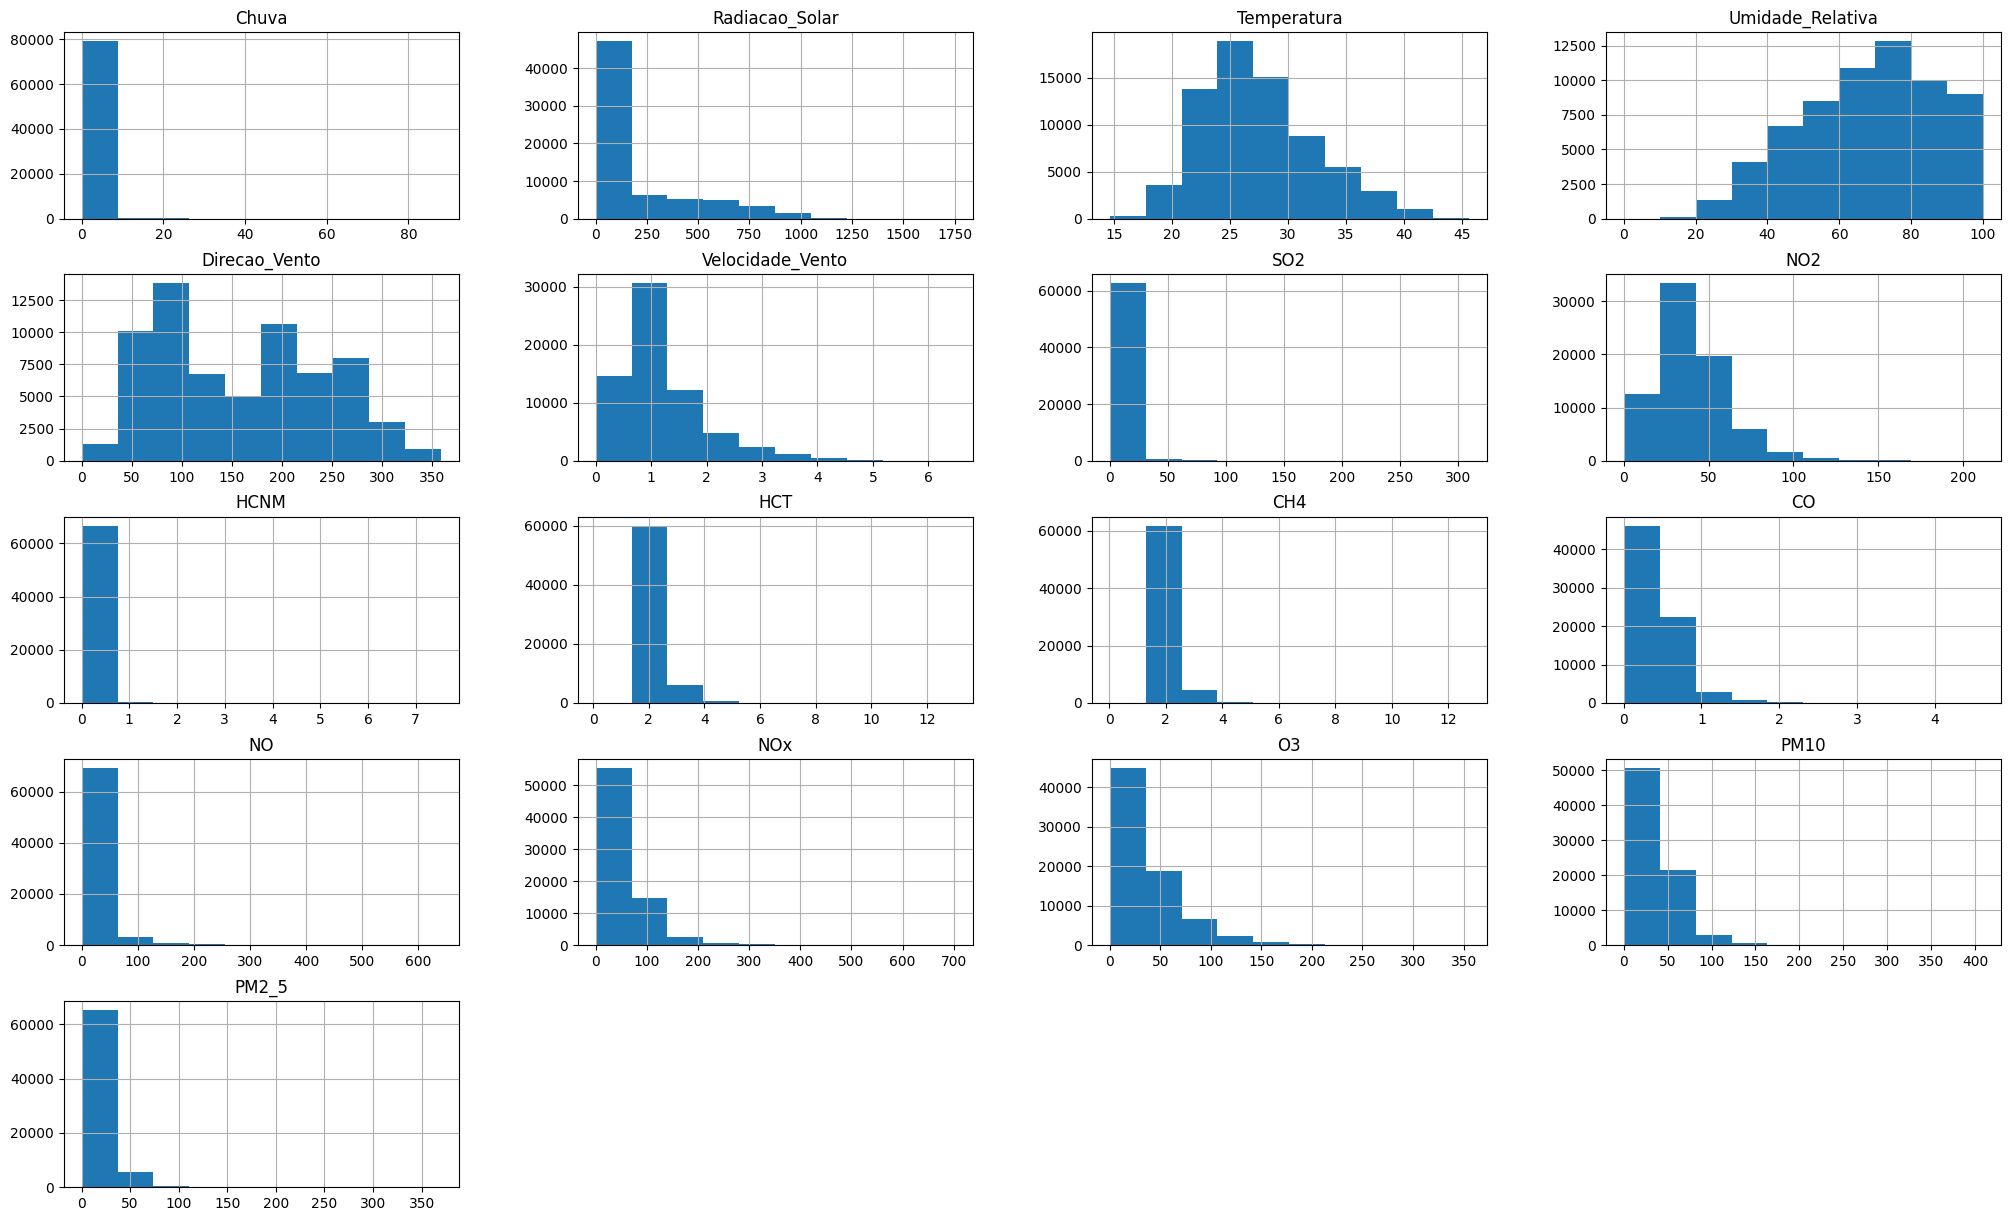

In [22]:
# Histograma

dadoarIR_Medidas.hist(figsize = (25,15))
plt.show()

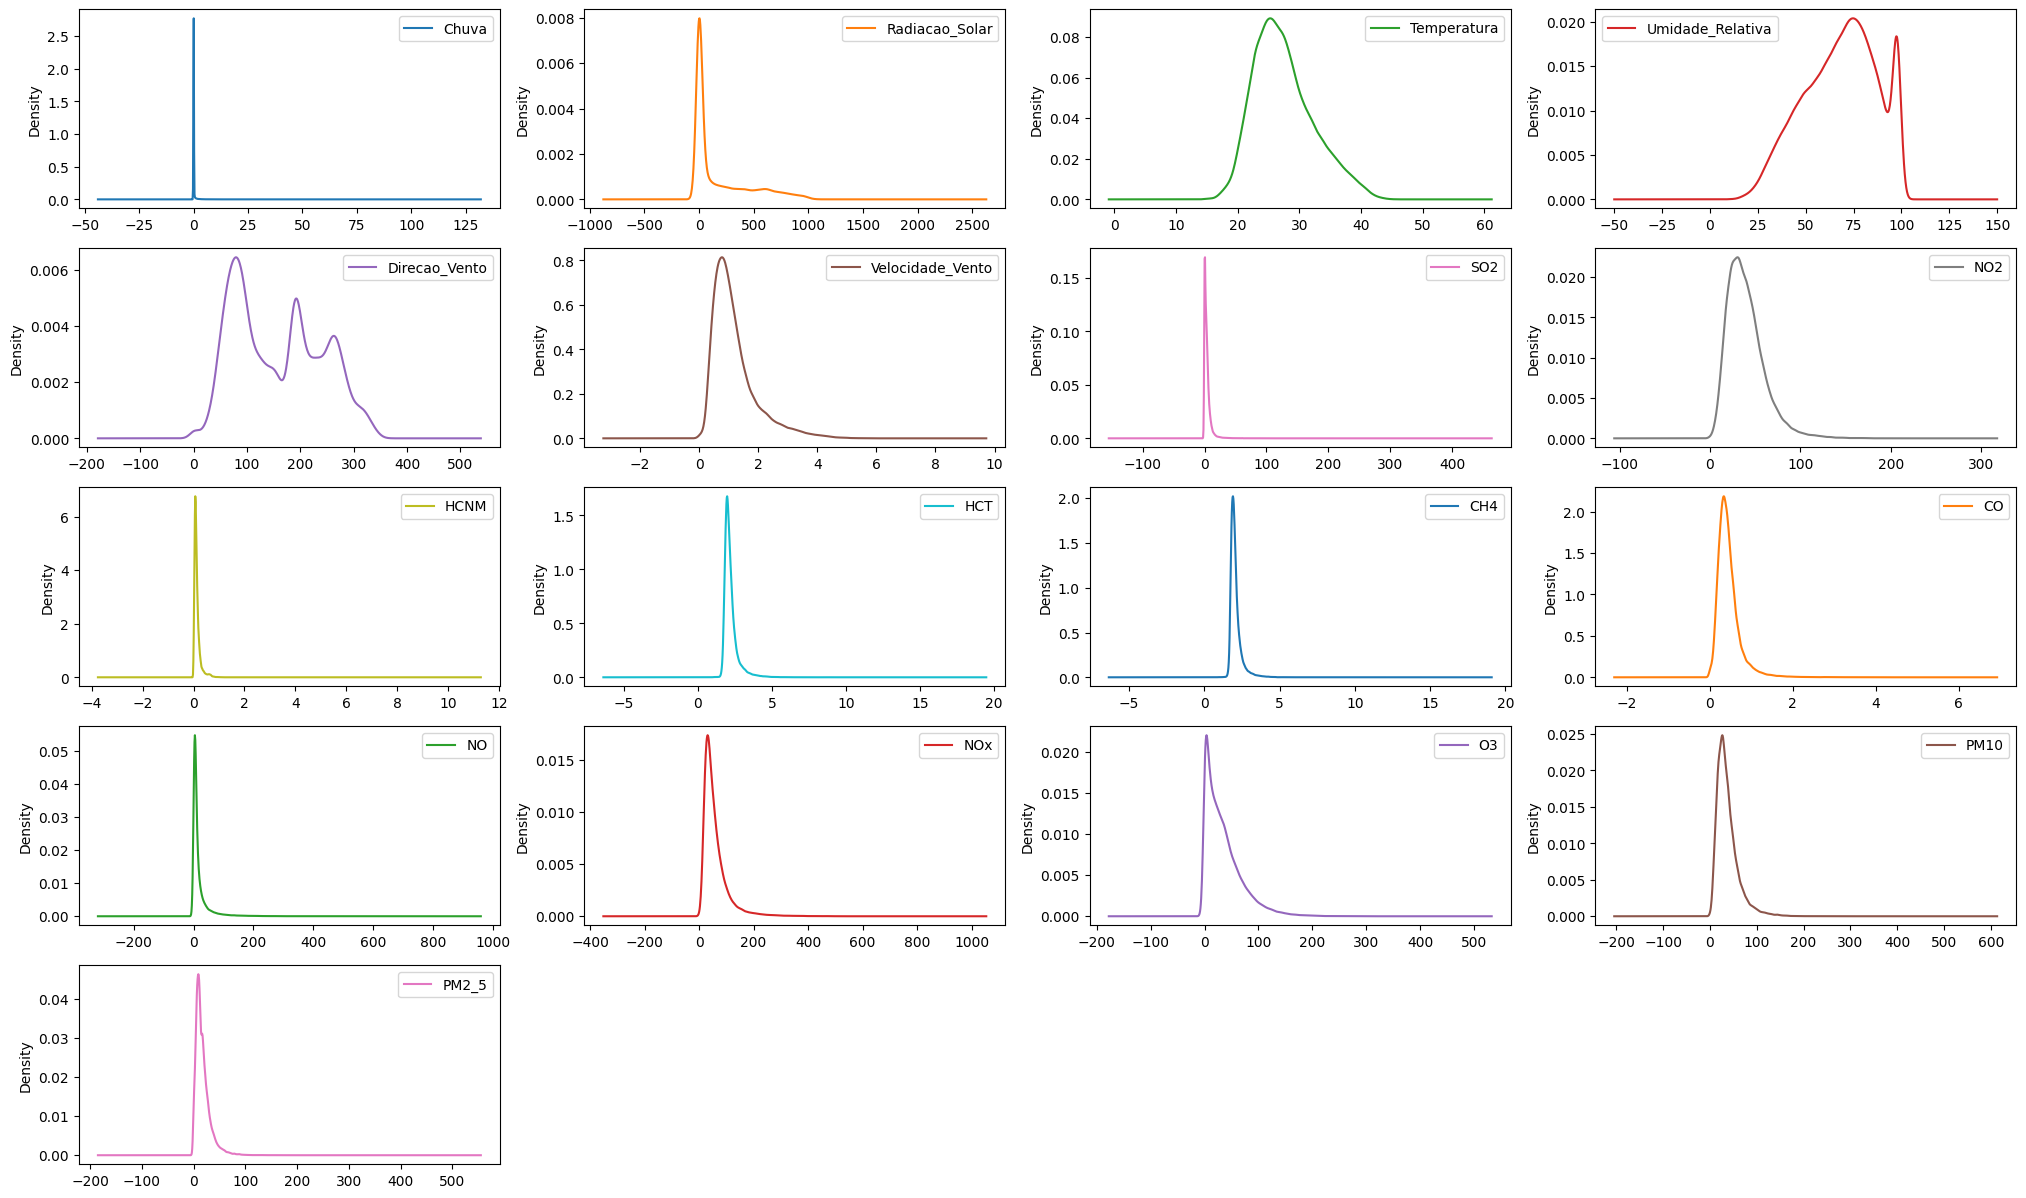

In [23]:
# Gráfico de densidade

dadoarIR_Medidas.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, figsize = (25,15))
plt.show()

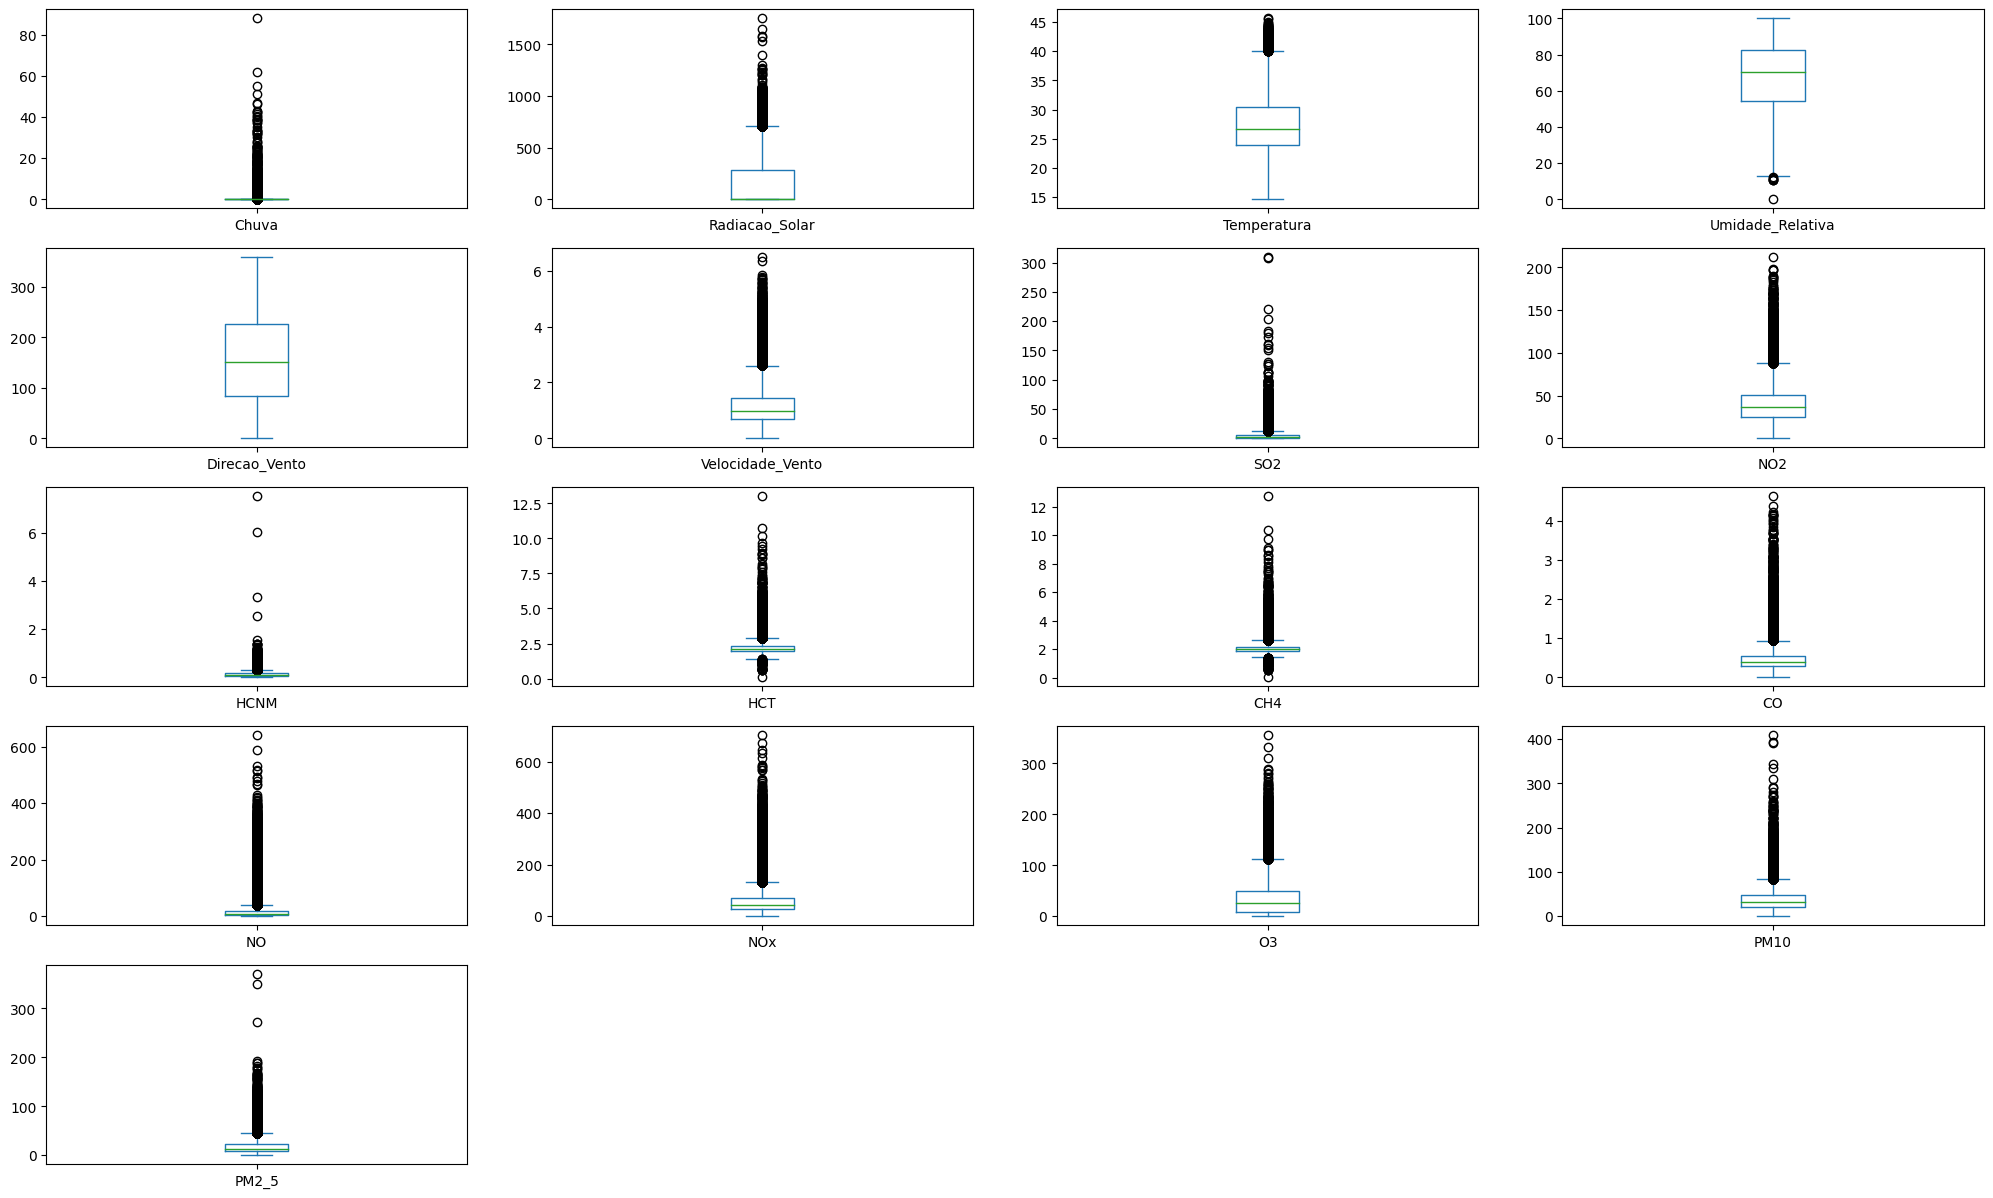

In [24]:
# Boxplot

dadoarIR_Medidas.plot(kind = 'box', subplots = True, layout = (5,4), sharex = False, sharey = False, figsize = (25,15))
plt.show()

# ***2 - Pré Processamento***


O pré-processamento consiste na etapa onde serão feitas as transformações consideradas necessárias para as análises. A principal transformação que ser apresentou necessária foi a do atributo Data de str para Date.

Outra operação de transformação consistiu na criação de variáveis de tempo, dada a proposta de se analisar os poluentes em perídos de tempo diferentes, sendo de interesse para a compreensão do impacto destes no período de 2012 a 2021.

Foi também verificada a existência de dados faltantes ou "missing" encontrados na base, esta verificação torna-se relevante na intenção de avaliar os períodos e para quais medições de quais poluentes ocorreu algum possível problema de ordem física na estação ou digital ocorrido no local onde tais dados foram hospedados. Para tal utilizamos a visualização em forma de matriz permitindo identificar espaços em branco informando ausência de valores.

Após a verificação e identificação de atributos com missing, foi realizada a imputação dos mesmos com valor zero, e em seguida a reconstrução da matriz confirmando a imputação e a ausência de valores faltantes no banco.

Em seguida com o banco tratado outra análise descritiva fez-se necessária, agora com o propósito de se identificar atributos com possíveis valores discrepantes, passíveis de um processo de normalização ou de padronização, no caso, foi escolhido o tratamento de normalização por sua aplicação não ter alterado o comportamento das variáveis tratadas.

## 2.1 - Tratando o Banco de dados 

In [25]:
# Alterando o atributo Data de str para formato data

dadoarIR['Data'] = pd.to_datetime(dadoarIR['Data'])

In [26]:
# Confirmando que a transformação foi feita com sucesso 
# na variável Data de str para date

dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Identificacao     79863 non-null  int64              
 1   Data              79863 non-null  datetime64[ns, UTC]
 2   Estacao           79863 non-null  object             
 3   Chuva             79394 non-null  float64            
 4   Radiacao_Solar    68397 non-null  float64            
 5   Temperatura       69942 non-null  float64            
 6   Umidade_Relativa  63458 non-null  float64            
 7   Direcao_Vento     66399 non-null  float64            
 8   Velocidade_Vento  66401 non-null  float64            
 9   SO2               63167 non-null  float64            
 10  NO2               73931 non-null  float64            
 11  HCNM              67060 non-null  float64            
 12  HCT               66986 non-null  float64            
 13  C

Estando nesta estapa de pré-processamento decidiu-se criar variáveis categóricas relativas à passagem do tempo, como Ano, Mês, Dia, nos períodos do dia e nos períodos climáticos Primavera, Verão, Outono e Inverno. Estas variáveis serão úteis em etapas posteriores na análise, permitindo avaliar a evolução da emissão destes dos poluentes, ao longo da série em uma análise de série histórica.


In [27]:
# Criando os campos ano, mês e dia criados a partir do atributo Data
# que servirão de filtros na construção de gráficos

dadoarIR['Ano'] = dadoarIR['Data'].dt.year
dadoarIR['Mes'] = dadoarIR['Data'].dt.month
dadoarIR['Dia'] = dadoarIR['Data'].dt.day
dadoarIR['Hora'] = dadoarIR['Data'].dt.hour
dadoarIR['Data_dt'] = dadoarIR['Data'].dt.date
dadoarIR['Data_dt'] = pd.to_datetime(dadoarIR['Data_dt'])

In [28]:
print(dadoarIR)

       Identificacao                      Data Estacao  Chuva  Radiacao_Solar  \
0             223917 2012-01-01 00:30:00+00:00      IR    0.8            0.83   
1             223918 2012-01-01 01:30:00+00:00      IR    0.0            1.00   
2             223919 2012-01-01 02:30:00+00:00      IR    0.0            1.00   
3             223920 2012-01-01 03:30:00+00:00      IR    0.0            1.00   
4             223921 2012-01-01 04:30:00+00:00      IR    0.0            1.00   
...              ...                       ...     ...    ...             ...   
79858         642173 2021-03-31 19:30:00+00:00      IR    0.0            6.00   
79859         642174 2021-03-31 20:30:00+00:00      IR    0.0            6.17   
79860         642175 2021-03-31 21:30:00+00:00      IR    0.0            6.00   
79861         642176 2021-03-31 22:30:00+00:00      IR    1.8            6.00   
79862         642177 2021-03-31 23:30:00+00:00      IR    0.2            7.00   

       Temperatura  Umidade

In [29]:
# Criando a variável "estacao_ano" para identificar as estações climáticas

dadoarIR["estacao_ano"] = dadoarIR["Data"].apply(calcula_estacao_ano)   

In [30]:
verifica_estacao_ano = dadoarIR[['Ano','Mes','Dia','estacao_ano']]
verifica_estacao_ano

,Ano,Mes,Dia,estacao_ano
0,2012,1,1,Verao
1,2012,1,1,Verao
2,2012,1,1,Verao
3,2012,1,1,Verao
4,2012,1,1,Verao
...,...,...,...,...
79858,2021,3,31,Outono
79859,2021,3,31,Outono
79860,2021,3,31,Outono
79861,2021,3,31,Outono


In [31]:
# Criando a variável "periodo_dia" para identificar manhã, tarde ou noite

dadoarIR["periodo_dia"] = dadoarIR["Hora"].apply(calcula_periodo_dia)  

In [32]:
# Comando pd.set_option permite aumentar a quantidade de colunas apresentadas

pd.set_option('display.max_columns', None)
dadoarIR

,Identificacao,Data,Estacao,Chuva,Radiacao_Solar,Temperatura,Umidade_Relativa,Direcao_Vento,Velocidade_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5,Ano,Mes,Dia,Hora,Data_dt,estacao_ano,periodo_dia
0,223917,2012-01-01 00:30:00+00:00,IR,0.8,0.83,24.84,97.12,NaN,NaN,2.55,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0,2012,1,1,0,2012-01-01,Verao,Manhã
1,223918,2012-01-01 01:30:00+00:00,IR,0.0,1.00,24.68,96.00,NaN,NaN,0.45,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0,2012,1,1,1,2012-01-01,Verao,Manhã
2,223919,2012-01-01 02:30:00+00:00,IR,0.0,1.00,24.56,96.39,NaN,NaN,0.11,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0,2012,1,1,2,2012-01-01,Verao,Manhã
3,223920,2012-01-01 03:30:00+00:00,IR,0.0,1.00,24.65,96.87,NaN,NaN,0.70,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0,2012,1,1,3,2012-01-01,Verao,Manhã
4,223921,2012-01-01 04:30:00+00:00,IR,0.0,1.00,24.66,96.32,NaN,NaN,0.79,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0,2012,1,1,4,2012-01-01,Verao,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79858,642173,2021-03-31 19:30:00+00:00,IR,0.0,6.00,26.98,60.72,226.50,1.20,11.11,30.38,0.04,2.14,2.10,NaN,7.94,38.32,17.04,29.0,0.0,2021,3,31,19,2021-03-31,Outono,Noite
79859,642174,2021-03-31 20:30:00+00:00,IR,0.0,6.17,26.82,60.65,227.17,1.25,12.12,28.38,0.02,2.08,2.05,NaN,6.71,35.09,18.76,28.0,2.0,2021,3,31,20,2021-03-31,Outono,Noite
79860,642175,2021-03-31 21:30:00+00:00,IR,0.0,6.00,26.70,60.43,249.50,0.85,11.12,24.53,0.11,2.50,2.39,NaN,5.05,29.58,21.30,26.0,7.0,2021,3,31,21,2021-03-31,Outono,Noite
79861,642176,2021-03-31 22:30:00+00:00,IR,1.8,6.00,25.80,71.95,299.17,1.15,11.26,28.75,0.03,2.09,2.06,NaN,4.19,32.94,17.11,30.0,11.0,2021,3,31,22,2021-03-31,Outono,Noite


## 2.2 - Verificando missing

In [33]:
# verificando nulls - valores faltantes no dataset

dadoarIR.isnull().sum()

Identificacao           0
Data                    0
Estacao                 0
Chuva                 469
Radiacao_Solar      11466
Temperatura          9921
Umidade_Relativa    16405
Direcao_Vento       13464
Velocidade_Vento    13462
SO2                 16696
NO2                  5932
HCNM                12803
HCT                 12877
CH4                 12802
CO                   7511
NO                   5945
NOx                  5936
O3                   6141
PM10                 3755
PM2_5                8442
Ano                     0
Mes                     0
Dia                     0
Hora                    0
Data_dt                 0
estacao_ano             0
periodo_dia             0
dtype: int64

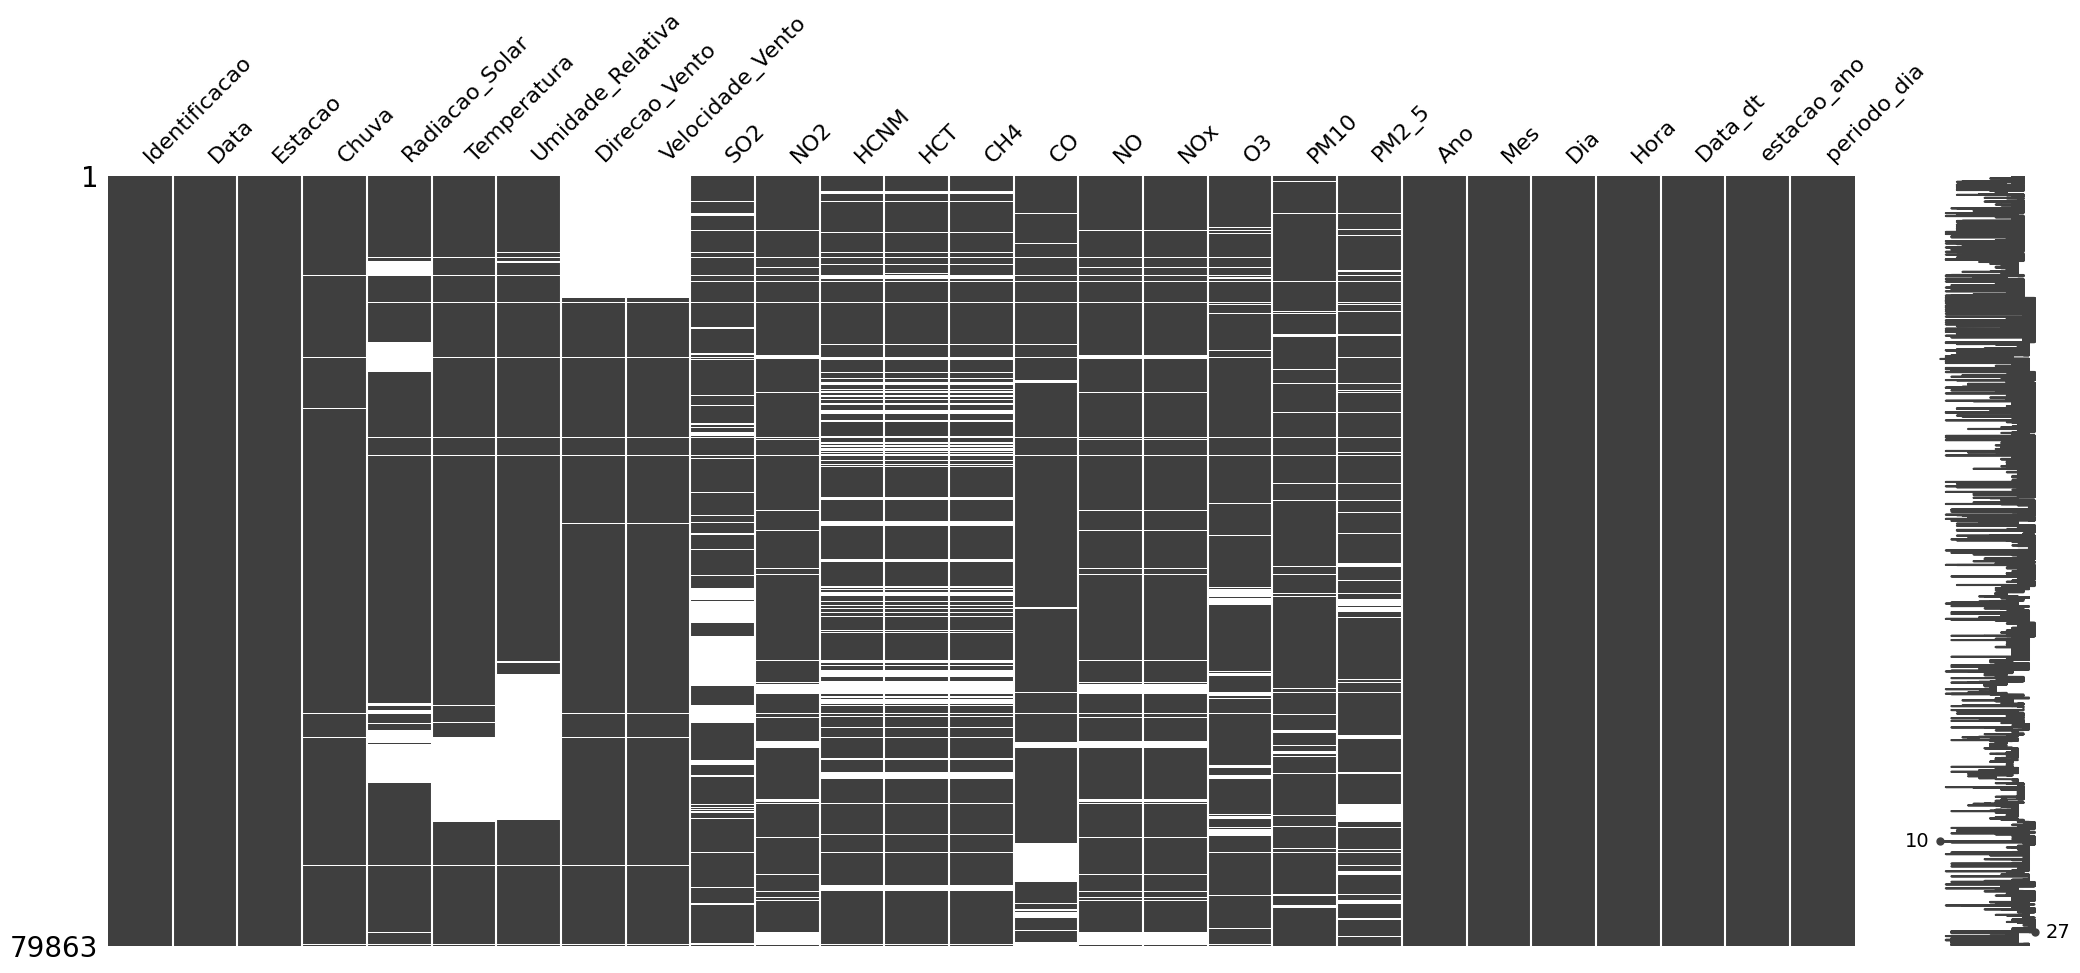

In [34]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dadoarIR.columns)

# o novo dataset irá conter todas as colunas do dataset original
dadoarIRSemMissings = dadoarIR[col[:]]

# exibindo visualização matricial do dataset antes da imputação
ms.matrix(dadoarIRSemMissings);

In [35]:
# Imputando dados - substituindo os atributos com valores faltantes pelo valor zero

dadoarIRSemMissings['Chuva'].fillna(0, inplace=True)
dadoarIRSemMissings['Radiacao_Solar'].fillna(0, inplace=True)
dadoarIRSemMissings['Temperatura'].fillna(0, inplace=True)
dadoarIRSemMissings['Umidade_Relativa'].fillna(0, inplace=True)
dadoarIRSemMissings['Direcao_Vento'].fillna(0, inplace=True)
dadoarIRSemMissings['Velocidade_Vento'].fillna(0, inplace=True)
dadoarIRSemMissings['SO2'].fillna(0, inplace=True)
dadoarIRSemMissings['NO2'].fillna(0, inplace=True)
dadoarIRSemMissings['HCNM'].fillna(0, inplace=True)
dadoarIRSemMissings['HCT'].fillna(0, inplace=True)
dadoarIRSemMissings['CH4'].fillna(0, inplace=True)
dadoarIRSemMissings['CO'].fillna(0, inplace=True)
dadoarIRSemMissings['NO'].fillna(0, inplace=True)
dadoarIRSemMissings['NOx'].fillna(0, inplace=True)
dadoarIRSemMissings['O3'].fillna(0, inplace=True)
dadoarIRSemMissings['PM10'].fillna(0, inplace=True)
dadoarIRSemMissings['PM2_5'].fillna(0, inplace=True)

In [36]:
# verificando novamente, após a imputação nulls - valores faltantes no dataset

dadoarIRSemMissings.isna().sum()

Identificacao       0
Data                0
Estacao             0
Chuva               0
Radiacao_Solar      0
Temperatura         0
Umidade_Relativa    0
Direcao_Vento       0
Velocidade_Vento    0
SO2                 0
NO2                 0
HCNM                0
HCT                 0
CH4                 0
CO                  0
NO                  0
NOx                 0
O3                  0
PM10                0
PM2_5               0
Ano                 0
Mes                 0
Dia                 0
Hora                0
Data_dt             0
estacao_ano         0
periodo_dia         0
dtype: int64

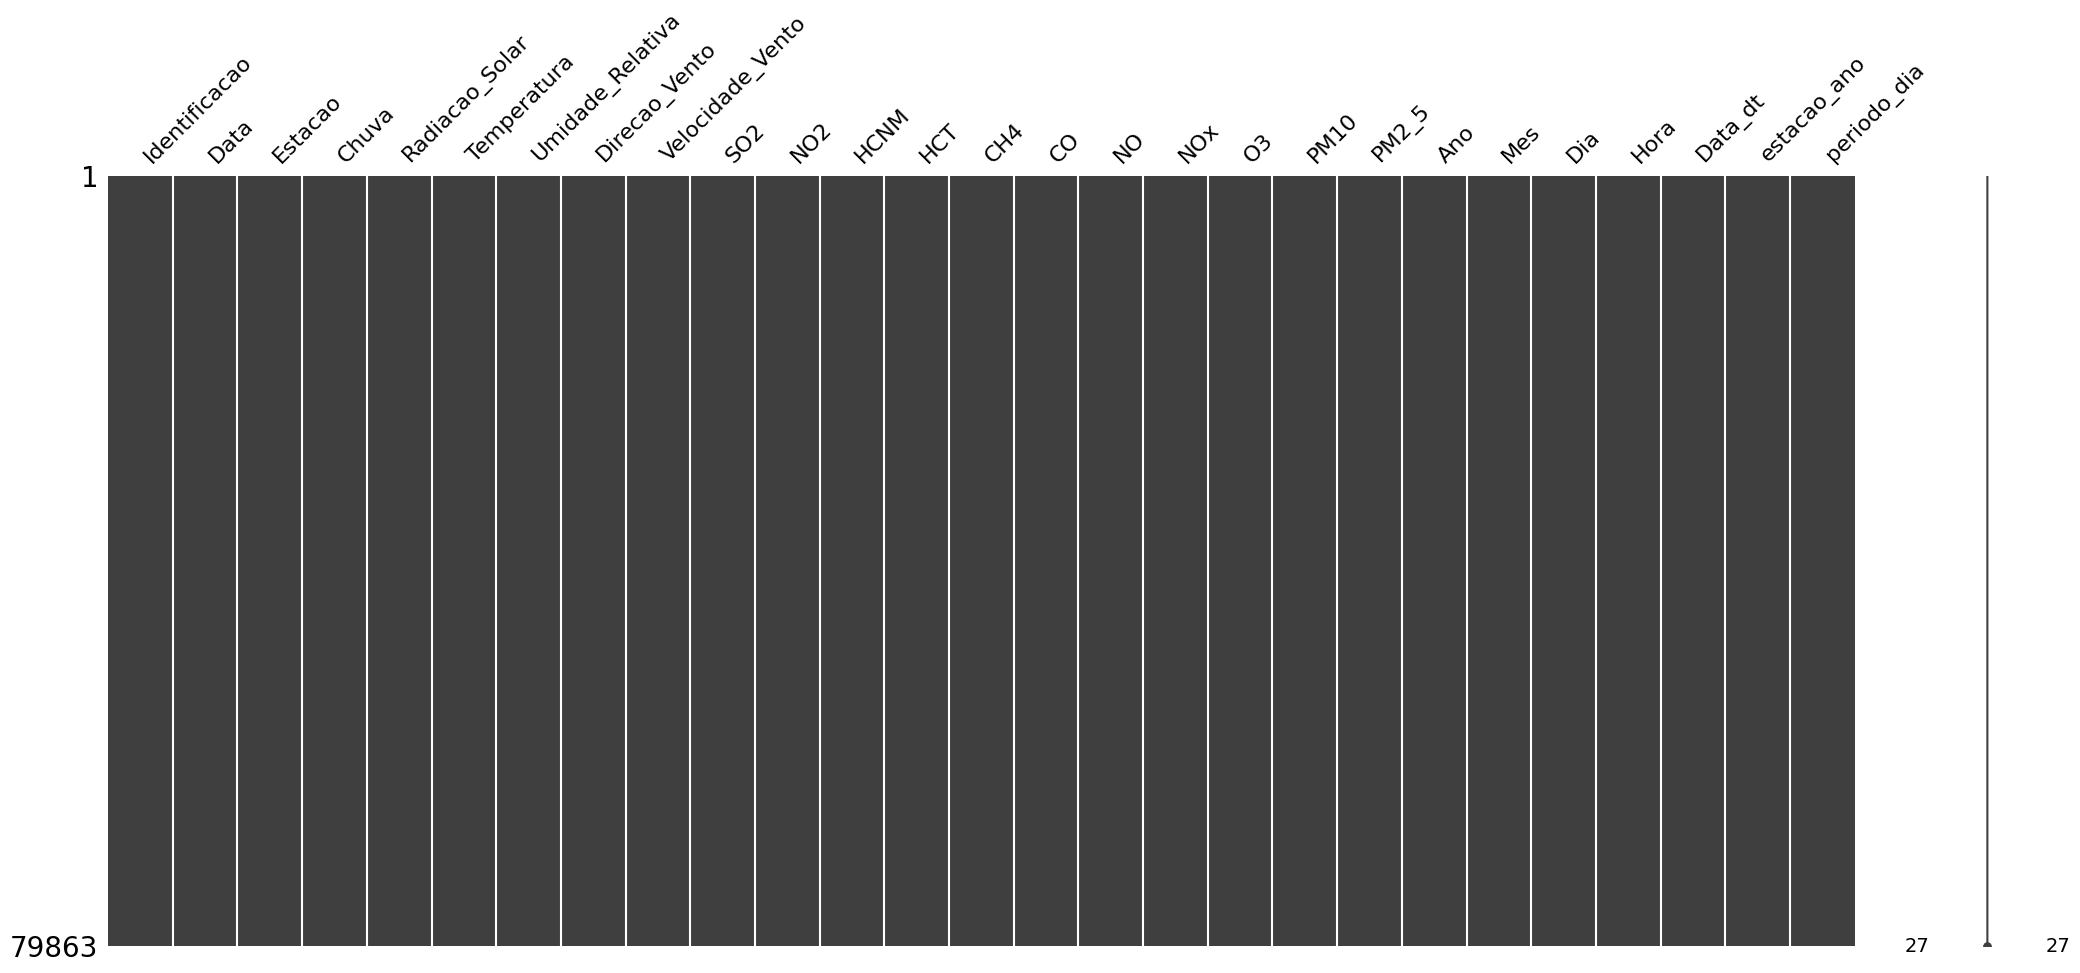

In [37]:
# exibindo visualização matricial do dataset após a imputação

ms.matrix(dadoarIRSemMissings);

A análise descritiva dos poluentes mostra que alguns são passíveis de receberem tratamento de padronização ou de transformação logarítimica, pois todos apresentam range elevado se observarmos sua média, valor mínimo e valor máximo. A seguir temos os poluentes e suas estatísticas:

*   Chuva - média 0.13, valor mínimo 0 e valor máximo de 88;

*   SO2 - média 3.23, valor mínimo 0 e valor máximo de 309.13;

*   HCNM - média 0.1, valor mínimo 0 e valor máximo de 7.53;

*   HCT - média 1.85, valor mínimo 0 e valor máximo de 13.01;

*   CH4 - média 1.75, valor mínimo 0 e valor máximo de 12.73;

*   CO - média 0.4, valor mínimo 0 e valor máximo de 4.62;

*   NO - média 3.23, valor mínimo 0 e valor máximo de 309.13;

In [38]:
# Sumário estatístico para os atributos numéricos após a imputação 

dadoarIRSemMissings.describe()

,Identificacao,Chuva,Radiacao_Solar,Temperatura,Umidade_Relativa,Direcao_Vento,Velocidade_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5,Ano,Mes,Dia,Hora
count,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.000000,79863.00000,79863.000000,79863.000000
mean,359485.039618,0.133859,147.763128,24.039138,54.291166,131.508565,0.989123,3.234370,36.768672,0.109324,1.852426,1.745837,0.406745,17.042641,53.781061,32.422364,35.511598,15.487301,2016.148630,6.42201,15.677711,11.502310
std,153056.361705,1.214768,250.903831,10.134330,32.366221,95.523284,0.819804,6.314641,22.448568,0.128324,0.923385,0.846245,0.306095,33.240098,48.024687,33.868897,24.641448,14.885960,2.679367,3.48899,8.802804,6.922001
min,223917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.00000,1.000000,0.000000
25%,243882.500000,0.000000,0.000000,22.520000,35.820000,59.500000,0.470000,0.000000,22.240000,0.040000,1.840000,1.780000,0.230000,2.520000,26.360000,5.780000,20.000000,6.000000,2014.000000,3.00000,8.000000,6.000000
50%,263848.000000,0.000000,1.000000,25.920000,62.750000,113.670000,0.870000,1.450000,34.410000,0.080000,2.020000,1.930000,0.370000,6.310000,42.050000,23.160000,31.000000,12.000000,2016.000000,6.00000,16.000000,12.000000
75%,503444.500000,0.000000,206.500000,29.680000,79.250000,208.670000,1.330000,4.290000,48.810000,0.140000,2.260000,2.120000,0.520000,16.330000,67.390000,47.760000,45.000000,21.000000,2018.000000,9.00000,23.000000,18.000000
max,642177.000000,88.000000,1752.670000,45.650000,100.000000,358.830000,6.480000,309.130000,211.810000,7.530000,13.010000,12.730000,4.620000,640.380000,702.670000,355.450000,409.000000,370.000000,2021.000000,12.00000,31.000000,23.000000


## 2.3 - Normalizando o Banco de dados

Nesta etapa foi utilizado o dataset dadoarIR_Medidas onde tem-se apenas os atributos numéricos. Assim o mesmo também será utilizado na ação de padronização

In [39]:
# Normalização

datanorm = np.asarray(dadoarIR_Medidas)

In [40]:
# Definindo o transformador como min max scaler

scaler = MinMaxScaler()


# Transformando os dados

scaled = scaler.fit_transform(datanorm)
print(scaled)

[[0.00909091 0.00047356 0.32979066 ... 0.07041778 0.21760391 0.22972973]
 [0.         0.00057056 0.32463768 ... 0.06456604 0.0806846  0.08648649]
 [0.         0.00057056 0.32077295 ... 0.06276551 0.04645477 0.03783784]
 ...
 [0.         0.00342335 0.38969404 ... 0.05992404 0.06356968 0.01891892]
 [0.02045455 0.00342335 0.36070853 ... 0.04813617 0.07334963 0.02972973]
 [0.00227273 0.00399391 0.28341385 ... 0.03435082 0.10513447 0.05405405]]


Para a transformação do array em um Dataframe, onde o array não possui nome em suas colunas, deve-se nomear as colunas obedecendo a ordem das mesmas oriundas do Dataframe original, no caso, dadoarIR_Medidas.

In [60]:
# Transformando o array em um DataFrame 

colnames = ['Chuva','Radiacao_Solar','Temperatura','Umidade_Relativa','Direcao_Vento',
                             'Velocidade_Vento','SO2','NO2','HCNM','HCT','CH4',
                             'CO','NO','NOx','O3','PM10','PM2_5']

dadoarIR_Normalizado = pd.DataFrame(scaled, columns = colnames)


# Exibindo os dados transformados

print("Dados Originais: \n\n", dadoarIR.values)
print("\nDados Normalizados : \n\n", dadoarIR_Normalizado)

Dados Originais: 

 [[223917 Timestamp('2012-01-01 00:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2012-01-01 00:00:00') 'Verao' 'Manhã']
 [223918 Timestamp('2012-01-01 01:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2012-01-01 00:00:00') 'Verao' 'Manhã']
 [223919 Timestamp('2012-01-01 02:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2012-01-01 00:00:00') 'Verao' 'Manhã']
 ...
 [642175 Timestamp('2021-03-31 21:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2021-03-31 00:00:00') 'Outono' 'Noite']
 [642176 Timestamp('2021-03-31 22:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2021-03-31 00:00:00') 'Outono' 'Noite']
 [642177 Timestamp('2021-03-31 23:30:00+0000', tz='UTC') 'IR' ...
  Timestamp('2021-03-31 00:00:00') 'Outono' 'Noite']]

Dados Normalizados : 

           Chuva  Radiacao_Solar  Temperatura  Umidade_Relativa  Direcao_Vento  \
0      0.009091        0.000474     0.329791            0.9712            NaN   
1      0.000000        0.000571     0.324638            0.9600            Na

In [42]:
# Acrescentando o atributo Ano e Estação do ano ao novo DataFrame normalizado

dadoarIR_Normalizado['Data'] = dadoarIR['Data']
dadoarIR_Normalizado['Ano'] = dadoarIR['Ano']
dadoarIR_Normalizado['estacao_ano'] = dadoarIR['estacao_ano']

print(dadoarIR_Normalizado)

          Chuva  Radiacao_Solar  Temperatura  Umidade_Relativa  Direcao_Vento  \
0      0.009091        0.000474     0.329791            0.9712            NaN   
1      0.000000        0.000571     0.324638            0.9600            NaN   
2      0.000000        0.000571     0.320773            0.9639            NaN   
3      0.000000        0.000571     0.323671            0.9687            NaN   
4      0.000000        0.000571     0.323994            0.9632            NaN   
...         ...             ...          ...               ...            ...   
79858  0.000000        0.003423     0.398712            0.6072       0.631218   
79859  0.000000        0.003520     0.393559            0.6065       0.633085   
79860  0.000000        0.003423     0.389694            0.6043       0.695315   
79861  0.020455        0.003423     0.360709            0.7195       0.833737   
79862  0.002273        0.003994     0.283414            0.9757       0.858819   

       Velocidade_Vento    

## 2.4 - Padronizando o Banco de dados

In [43]:
# Padronizando os dados

dadoarIR_Padrnz = StandardScaler().fit_transform(dadoarIR_Medidas)

In [44]:
# Exibindo os dados transformados

print("Dados Originais: \n\n", dadoarIR_Medidas.values)
print("\nDados Padronizados: \n\n", dadoarIR_Padrnz)

Dados Originais: 

 [[ 0.8   0.83 24.84 ... 25.03 89.   85.  ]
 [ 0.    1.   24.68 ... 22.95 33.   32.  ]
 [ 0.    1.   24.56 ... 22.31 19.   14.  ]
 ...
 [ 0.    6.   26.7  ... 21.3  26.    7.  ]
 [ 1.8   6.   25.8  ... 17.11 30.   11.  ]
 [ 0.2   7.   23.4  ... 12.21 43.   20.  ]]

Dados Padronizados (não inclui a coluna class): 

 [[ 0.54613009 -0.6525729  -0.53621049 ... -0.29791776  2.16346483
   4.60434455]
 [-0.11052288 -0.65192681 -0.56909428 ... -0.35931289 -0.17829405
   0.9988079 ]
 [-0.11052288 -0.65192681 -0.59375712 ... -0.3782037  -0.76373377
  -0.22571398]
 ...
 [-0.11052288 -0.63292396 -0.15393643 ... -0.40801576 -0.47101391
  -0.70191694]
 [ 1.36694632 -0.63292396 -0.33890775 ... -0.53169154 -0.30374541
  -0.42980096]
 [ 0.05364036 -0.62912339 -0.8321646  ... -0.67632431  0.23987718
   0.18245998]]


In [45]:
# Transformando o array em um DataFrame 

colnames = ['Chuva','Radiacao_Solar','Temperatura','Umidade_Relativa','Direcao_Vento',
                             'Velocidade_Vento','SO2','NO2','HCNM','HCT','CH4',
                             'CO','NO','NOx','O3','PM10','PM2_5']

dadoarIR_Padrnz = pd.DataFrame(scaled, columns = colnames)

print(dadoarIR_Padrnz)

          Chuva  Radiacao_Solar  Temperatura  Umidade_Relativa  Direcao_Vento  \
0      0.009091        0.000474     0.329791            0.9712            NaN   
1      0.000000        0.000571     0.324638            0.9600            NaN   
2      0.000000        0.000571     0.320773            0.9639            NaN   
3      0.000000        0.000571     0.323671            0.9687            NaN   
4      0.000000        0.000571     0.323994            0.9632            NaN   
...         ...             ...          ...               ...            ...   
79858  0.000000        0.003423     0.398712            0.6072       0.631218   
79859  0.000000        0.003520     0.393559            0.6065       0.633085   
79860  0.000000        0.003423     0.389694            0.6043       0.695315   
79861  0.020455        0.003423     0.360709            0.7195       0.833737   
79862  0.002273        0.003994     0.283414            0.9757       0.858819   

       Velocidade_Vento    

In [46]:
# Acrescentando o atributo Ano e Estação do ano ao novo DataFrame padronizado

dadoarIR_Padrnz['Ano'] = dadoarIR['Ano']
dadoarIR_Padrnz['estacao_ano'] = dadoarIR['estacao_ano']

print(dadoarIR_Padrnz)

          Chuva  Radiacao_Solar  Temperatura  Umidade_Relativa  Direcao_Vento  \
0      0.009091        0.000474     0.329791            0.9712            NaN   
1      0.000000        0.000571     0.324638            0.9600            NaN   
2      0.000000        0.000571     0.320773            0.9639            NaN   
3      0.000000        0.000571     0.323671            0.9687            NaN   
4      0.000000        0.000571     0.323994            0.9632            NaN   
...         ...             ...          ...               ...            ...   
79858  0.000000        0.003423     0.398712            0.6072       0.631218   
79859  0.000000        0.003520     0.393559            0.6065       0.633085   
79860  0.000000        0.003423     0.389694            0.6043       0.695315   
79861  0.020455        0.003423     0.360709            0.7195       0.833737   
79862  0.002273        0.003994     0.283414            0.9757       0.858819   

       Velocidade_Vento    

# ***3 - Etapa de Análise Exploratória***

Refazemos os histogramas do banco após a etapa do pré-processamento afim de se verificar alguma diferença entre o banco de dados original e o  banco, agora tratado, não encontramos diferença entre o comportamento das variáveis dos poluentes, o que é um resultado favorável, já que um tratamento de dados considerável satisfatório, em suma, não deve alterar o comportamento da variável.

## 3.1 - Gráfico Histograma dos dados Normalizados

É interessante observarmos a importância dos gráficos após qualquer transformação que o banco passe, o gráfico pode auxiliar na acertiva acima transcrita, sobre a verificação das distribuições das variáveis após tratamentos em um banco de dados. Assim são apresentados os histogramas do banco após a normalização e a padronização podendo estes serem comparados aos conjunto de histogramas da base original, feito anteriormente.

In [47]:
# Devido ao atributo Ano ser numérico e não ter passado pelo processo 
# normalização, foi feita a seleção dos atributos retirando o Ano

dadoarIR_Norm_Num = dadoarIR_Normalizado[['Chuva','Radiacao_Solar','Temperatura','Umidade_Relativa','Direcao_Vento',
                                          'Velocidade_Vento','SO2','NO2','HCNM','HCT','CH4',
                                          'CO','NO','NOx','O3','PM10','PM2_5']]

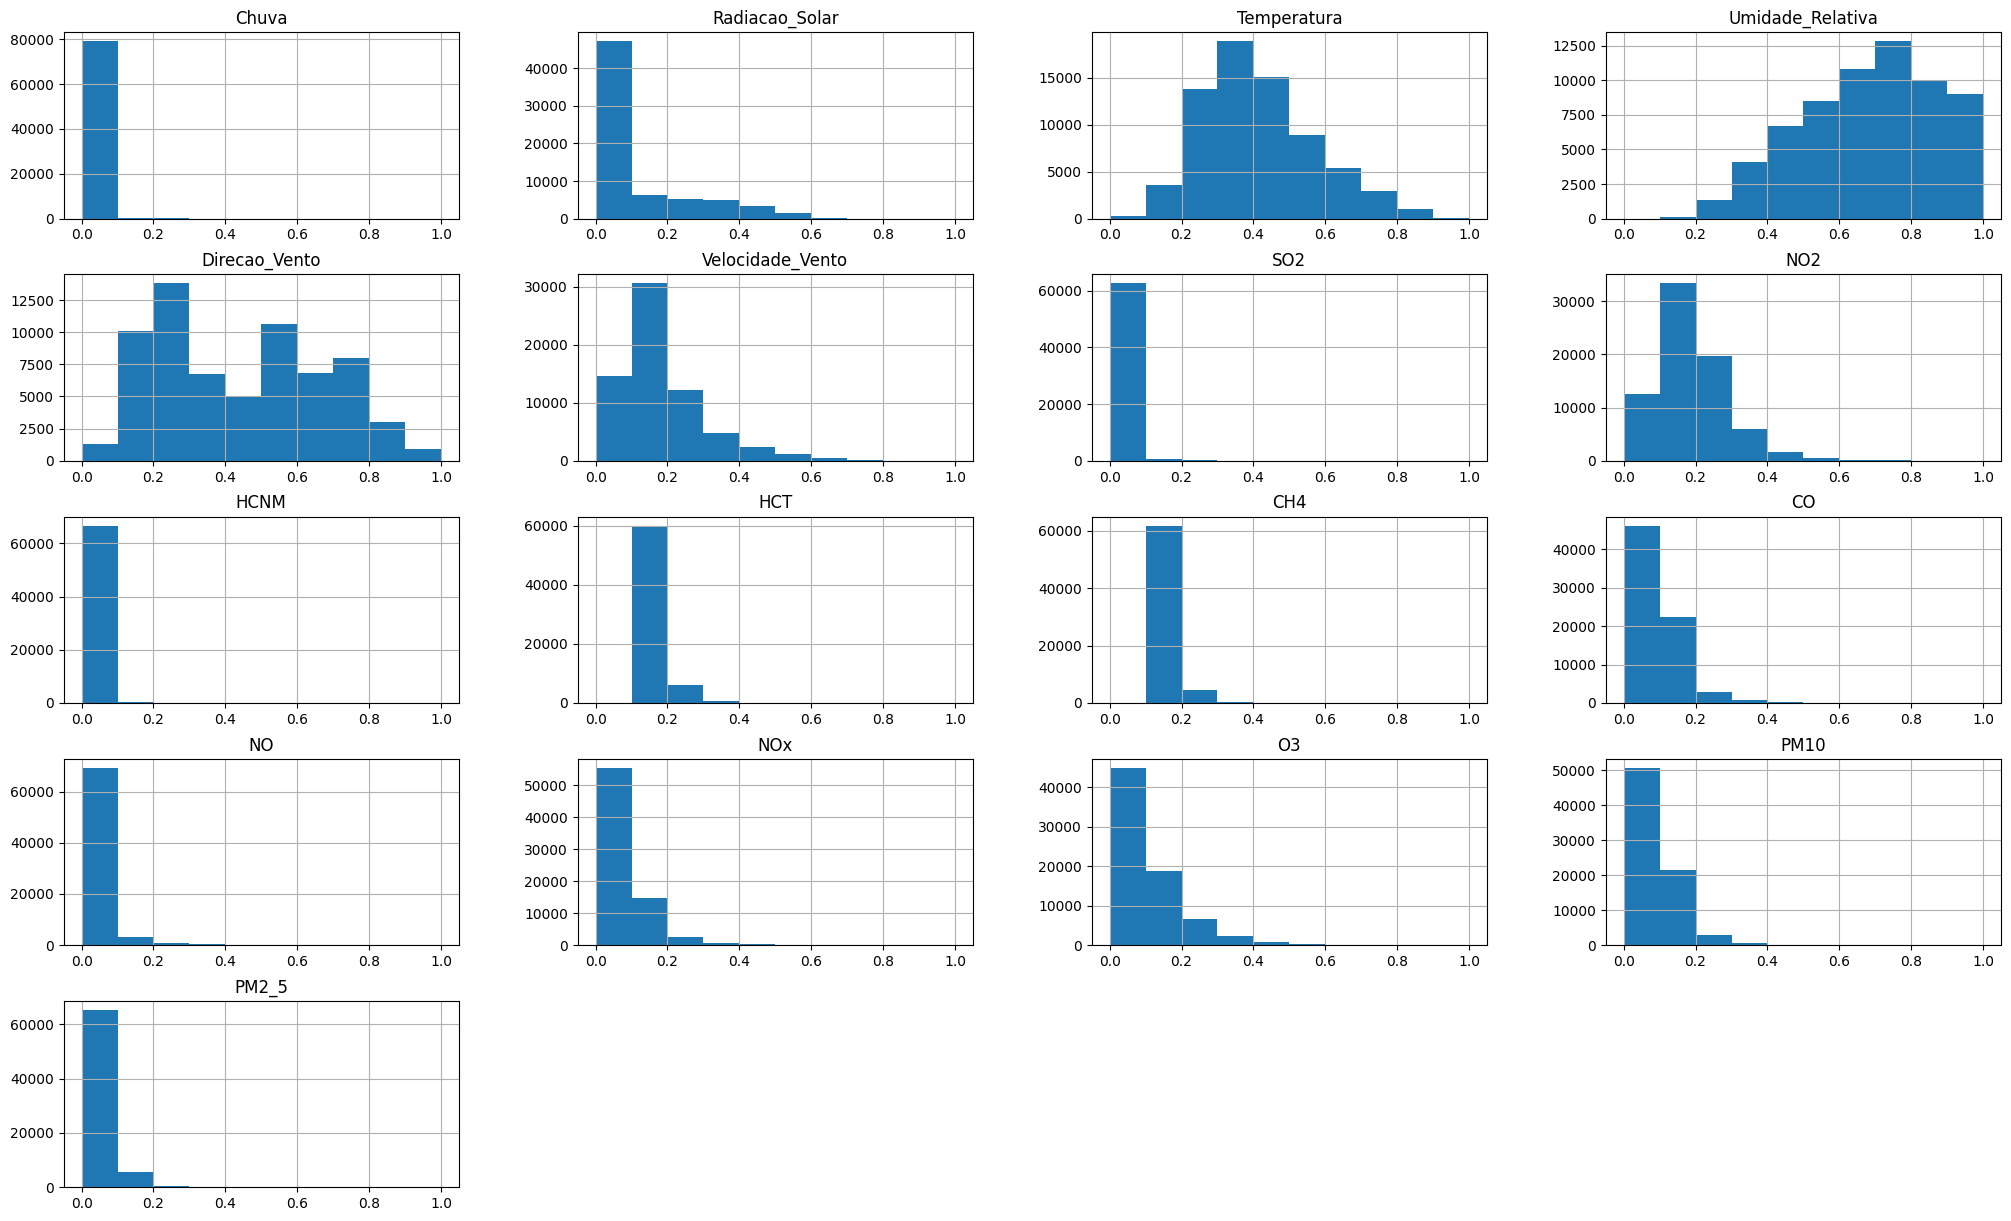

In [48]:
# Gráfico Histograma dos dados normalizados

dadoarIR_Norm_Num.hist(figsize = (25,15))
plt.show()

## 3.2 - Gráfico Histograma dos dados Padronizados

In [49]:
# Mesma ação realizada na normalização, devido ao atributo Ano ser numérico
# e não ter passado pelo processo de adronização, foi feita a seleção 
# dos atributos retirando o Ano

dadoarIR_Padrnz_Num = dadoarIR_Padrnz[['Chuva','Radiacao_Solar','Temperatura','Umidade_Relativa',
                                       'Direcao_Vento','Velocidade_Vento','SO2','NO2','HCNM','HCT',
                                       'CH4','CO','NO','NOx','O3','PM10','PM2_5']]

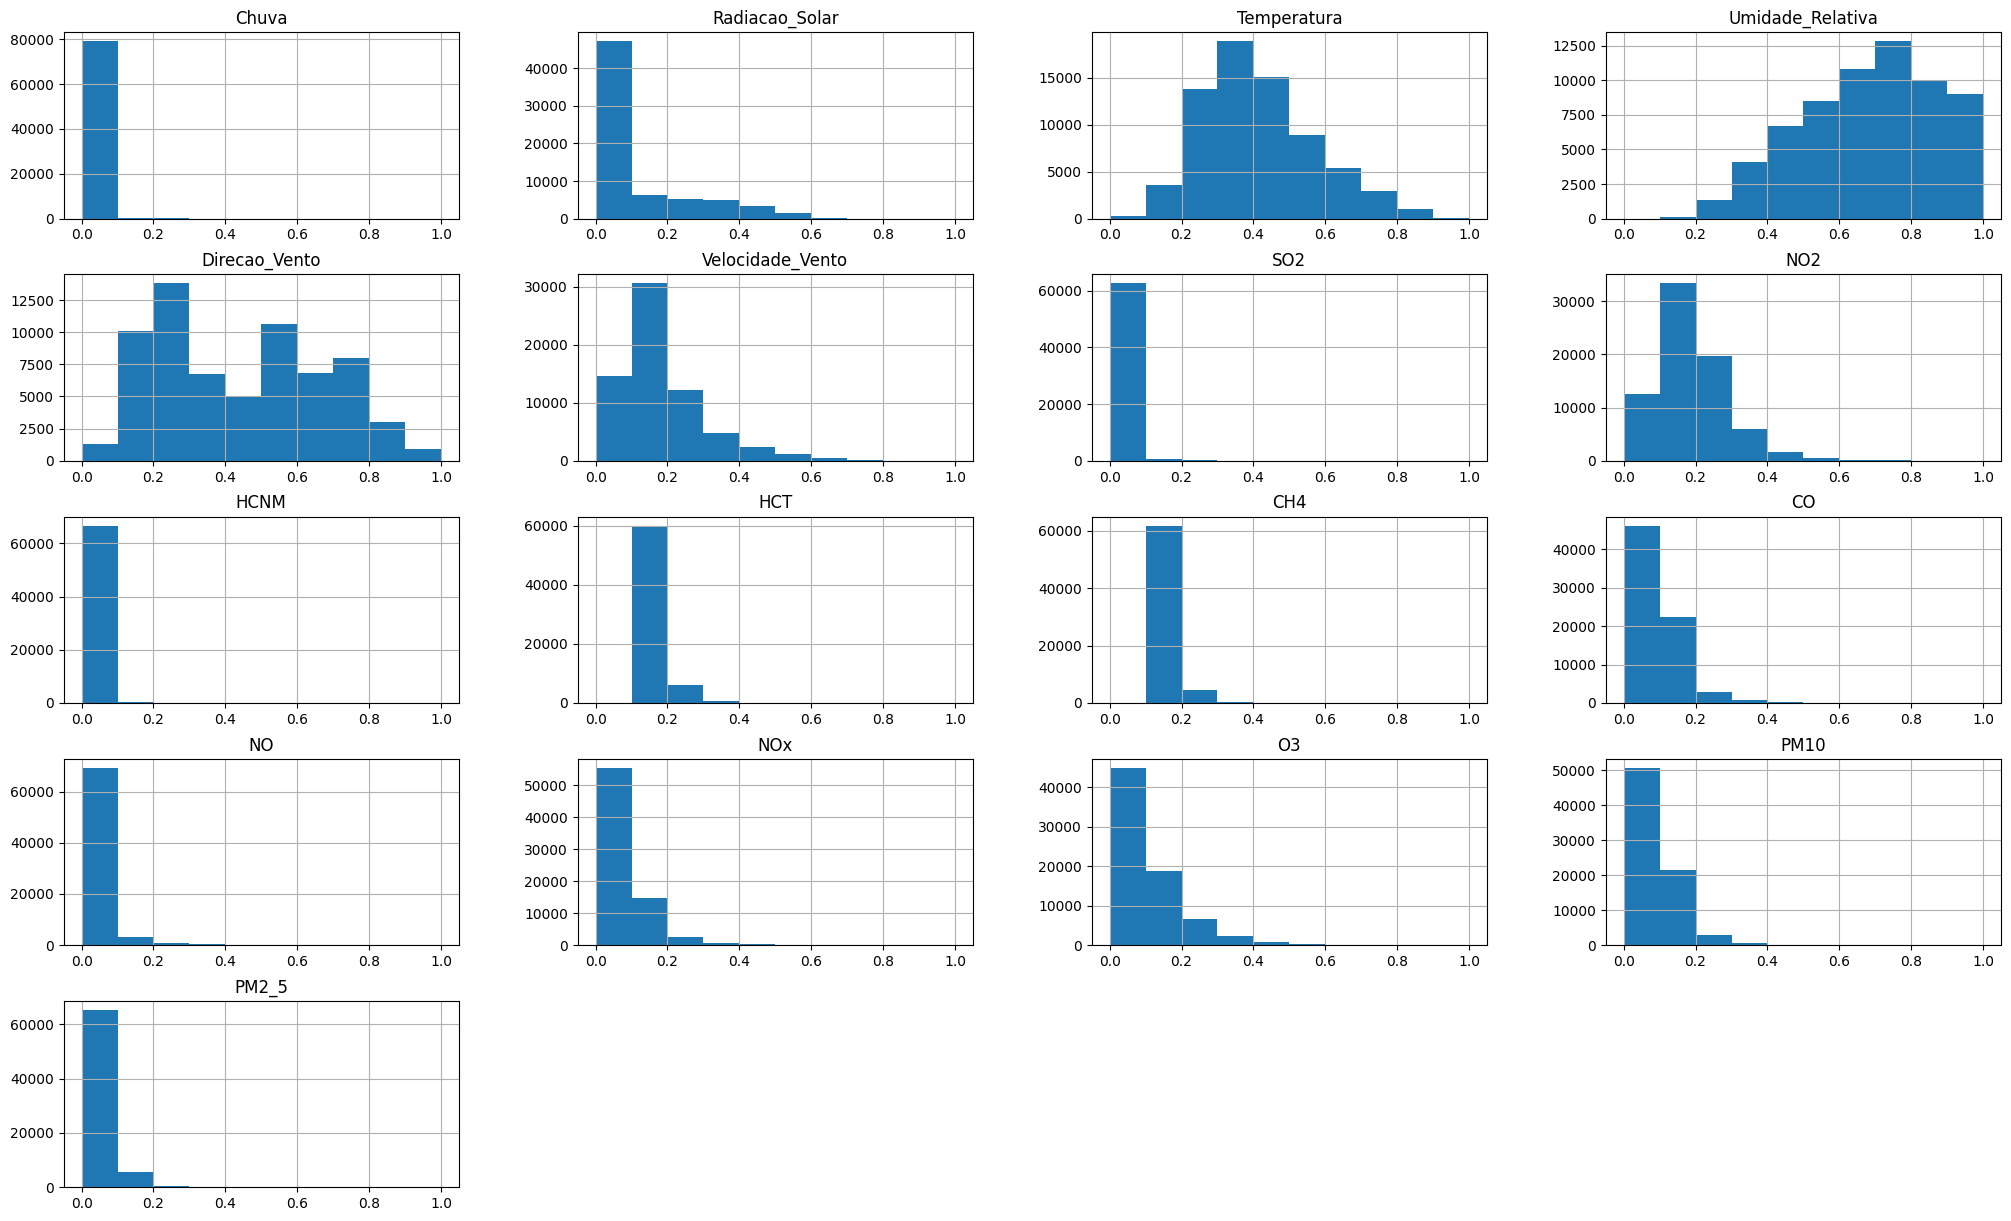

In [50]:
# Gráfico Histograma dos dados padronizados

dadoarIR_Padrnz_Num.hist(figsize = (25,15))
plt.show()

In [51]:
# Criando um dataset para ser usado na construção dos gráficos

dadoarIR_grf = dadoarIR[['Chuva','Radiacao_Solar','Temperatura','Ano','Data_dt','estacao_ano']]

In [52]:
print(dadoarIR_grf)

       Chuva  Radiacao_Solar  Temperatura   Ano    Data_dt estacao_ano
0        0.8            0.83        24.84  2012 2012-01-01       Verao
1        0.0            1.00        24.68  2012 2012-01-01       Verao
2        0.0            1.00        24.56  2012 2012-01-01       Verao
3        0.0            1.00        24.65  2012 2012-01-01       Verao
4        0.0            1.00        24.66  2012 2012-01-01       Verao
...      ...             ...          ...   ...        ...         ...
79858    0.0            6.00        26.98  2021 2021-03-31      Outono
79859    0.0            6.17        26.82  2021 2021-03-31      Outono
79860    0.0            6.00        26.70  2021 2021-03-31      Outono
79861    1.8            6.00        25.80  2021 2021-03-31      Outono
79862    0.2            7.00        23.40  2021 2021-03-31      Outono

[79863 rows x 6 columns]


## 3.3 - Visualizações Unimodais

In [56]:
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go

#fig = make_subplots(
#   rows=2, cols=2,
#    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))

#fig.add_trace(go.Bar(x=dadoarIR_grf['Ano'], y=dadoarIR_grf['Temperatura']),
#              row=1, col=1)

#fig.add_trace(go.Bar(x=dadoarIR_grf['Ano'], y=dadoarIR_grf['Chuva']),
#              row=1, col=2)

#fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
#              row=2, col=1)

#fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
#              row=2, col=2)

#fig.update_layout(height=500, width=700,
#                  title_text="Multiple Subplots with Titles")

#fig.show()

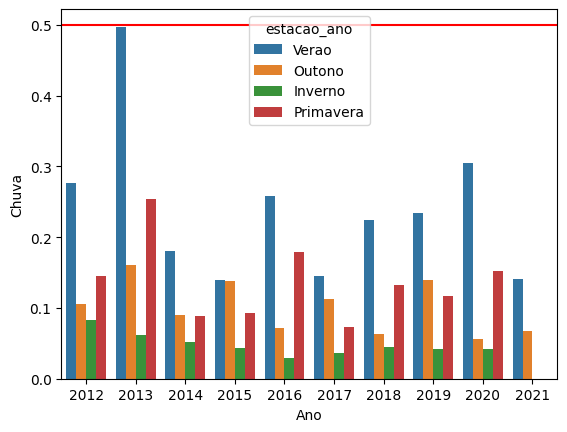

In [57]:
# Gráfico de barras referente à Chuva

sns.barplot(x = "Ano", y = "Chuva", hue = "estacao_ano", data = dadoarIR_grf, errorbar=None);
plt.axhline(y=0.5, color='r', linestyle='-')
plt.show();

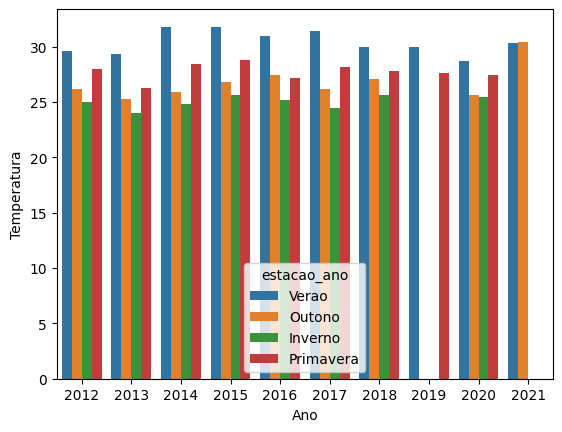

In [ ]:
sns.barplot(x = "Ano", y = "Temperatura", hue = "estacao_ano", data = dadoarIR_grf, errorbar=None);
plt.show();

AttributeError: ignored

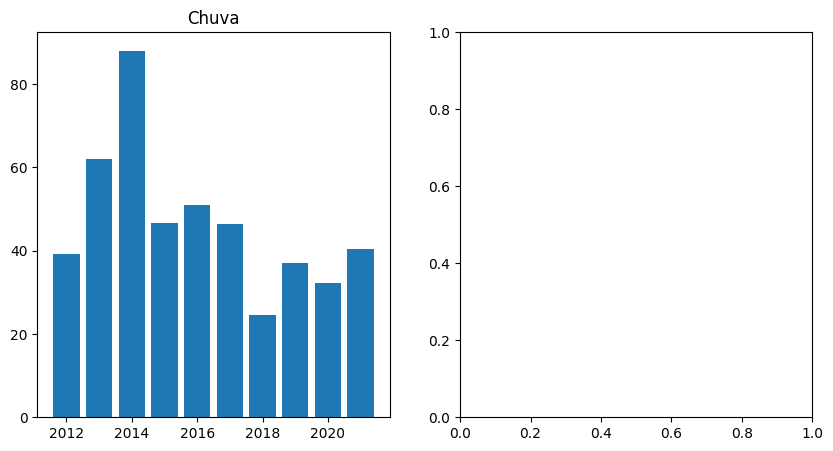

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#sns.barplot(x = "Ano", y = "Chuva", hue = "estacao_ano", data = dadoarIR_grf, errorbar=None);
#sns.barplot(x = "Ano", y = "Temperatura", hue = "estacao_ano", data = dadoarIR_grf, errorbar=None);

axs[0].bar(dadoarIR_grf['Ano'], dadoarIR_grf['Chuva'])
axs[0].set_title('Chuva')

axs[1].line(dadoarIR_grf['Ano'], dadoarIR_grf['Temperatura'])
axs[1].set_title('Temperatura')

fig.suptitle('Dois gráficos no mesmo frame')

plt.show()

In [ ]:
janela, graficos = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.tight_layout()

sns.barplot(data=df_por_sexo, x='sex', y='survived', ax=graficos[0][0])
sns.histplot(data=df_titanic, x='age', ax=graficos[0][1])
sns.boxplot(data=idades_com_outlier, orient='h', ax=graficos[1][0])
sns.heatmap(voos, annot=True, fmt='.0f', ax=graficos[1][1])

janela

## 3.4 - Visualizações Multimodal

In [ ]:
dadoarIR_grf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Chuva           79394 non-null  float64       
 1   Radiacao_Solar  68397 non-null  float64       
 2   Temperatura     69942 non-null  float64       
 3   Ano             79863 non-null  int64         
 4   Data_dt         79863 non-null  datetime64[ns]
 5   estacao_ano     79863 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 3.7+ MB


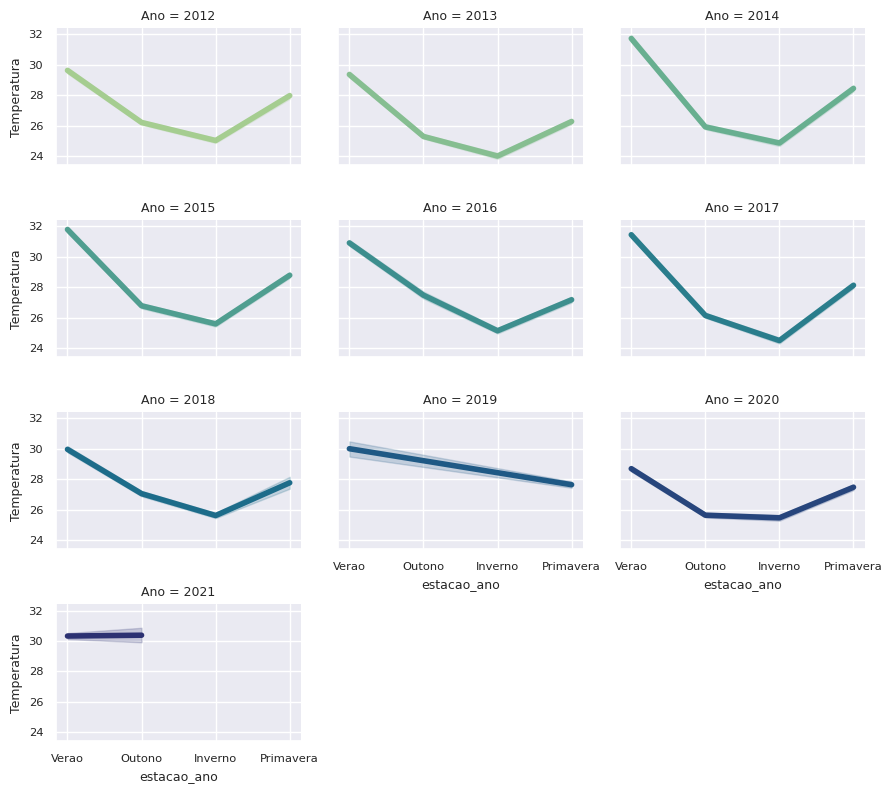

In [ ]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=dadoarIR_grf,
    x="estacao_ano", y="Temperatura", col="Ano", hue="Ano",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [ ]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left")

graf1 = sns.barplot(x='Data_dt', y='Chuva', hue='estacao_ano', data=dadoarIR_grf).set(title='Chuva');


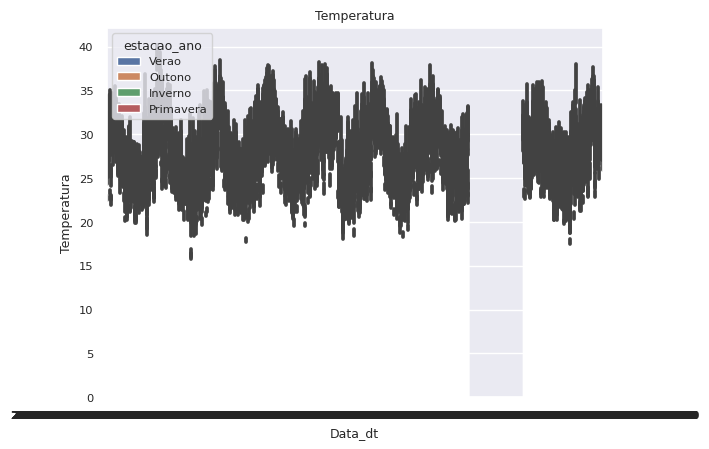

In [ ]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left")

graf2 = sns.barplot(x='Data_dt', y='Temperatura', hue='estacao_ano', data=dadoarIR_grf).set(title='Temperatura')

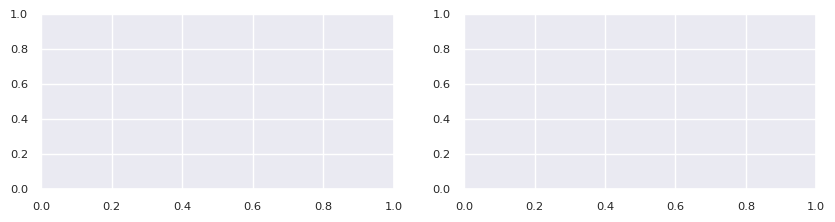

In [ ]:
# Desenhando os gráficos
#fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")
# Definindo o tamanho das figuras

fig = plt.figure(figsize=(10, 5))

sns.set_theme(style="darkgrid", font_scale=0.75)

plt.tight_layout()
plt.subplot(2,2,1)
graf1
plt.subplot(2,2,2)
graf2;

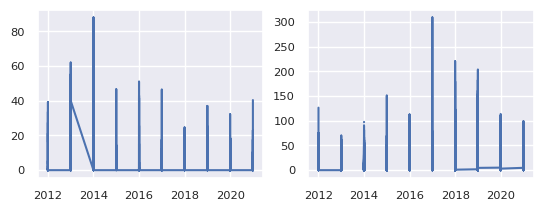

In [ ]:
x1 = dadoarIR['Ano']
y1 = dadoarIR['Chuva']
x2 = dadoarIR['Ano']
y2 = dadoarIR['SO2']

plt.tight_layout()
plt.subplot(2,2,1)
plt.plot(x1,y1)
plt.subplot(2,2,2)
plt.plot(x2,y2);


In [ ]:
#!pip install plotly

from plotly.subplots import make_subplots
import plotly.graph_objects as go

y = dadoarIR_grf['Chuva']
x = dadoarIR_grf['Ano']

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x, y),
    row=1, col=1
)

#fig.add_trace(
#    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
#    row=1, col=1
#)

#fig.add_trace(
#    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#    row=1, col=2
#)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

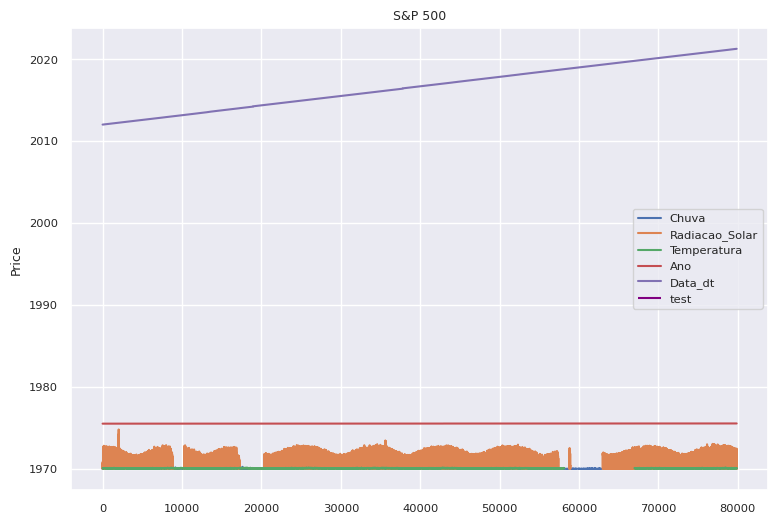

In [ ]:
# plot dataframe
ax = dadoarIR_grf.plot(figsize=(9, 6), title='S&P 500', ylabel='Price')

# add horizontal line
ax.hlines(y = dadoarIR_grf['Chuva'] , xmin = 0, xmax = 88, color='purple', label='test')

ax.legend()
plt.show()

AttributeError: ignored

<Figure size 900x300 with 0 Axes>

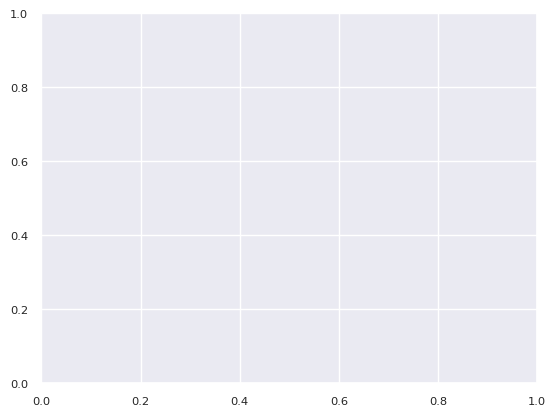

In [ ]:
# Definindo stilo e tamanho das fontes
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75) 

# Definindo o tamanho das figuras
fig = plt.figure(figsize=(9, 3))
grf = plt.subplots(1,1, sharey=True)

data1 = dadoarIR
names1 = list(data['Ano'])
values1 = list(data['Chuva'])

#grf[0].plt.plot(names, values)
grf[0].scatter(names1, values1)
#grf[2].plot(names, values)
#grf[3]

# Gráfico 1 - Barras de Count
#fig.add_subplot(221)
#sns.countplot(dadoarIR['Temperatura'])

# Gráfico 2 - Boxplot de Reason
#fig.add_subplot(222)
#sns.boxplot(x='Ano', y='Chuva', data=dadoarIR)

# Gráfico 3 - Boxplot de Absences
#fig.add_subplot(223)
#sns.boxplot(x='Ano', y='Chuva', data=dadoarIR)

# Gráfico 4 - Boxplot violino de Reason
#fig.add_subplot(224)
#sns.violinplot(x='Ano', y='Chuva', data=dadoarIR, palette='Set3', bw=.2, cut=1, split=True, linewidth=1);

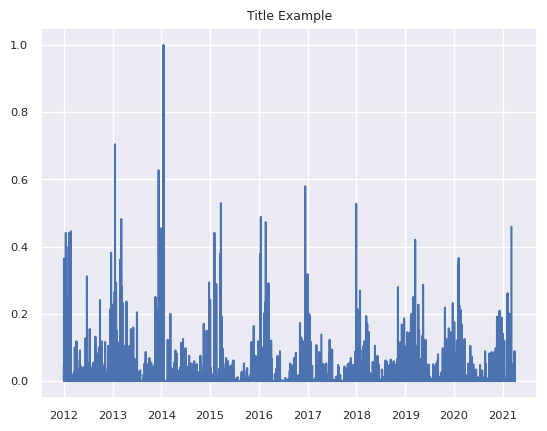

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75) 

plt.plot(dadoarIR_Normalizado['Data'], dadoarIR_Normalizado['Chuva']);
plt.title('Title Example');

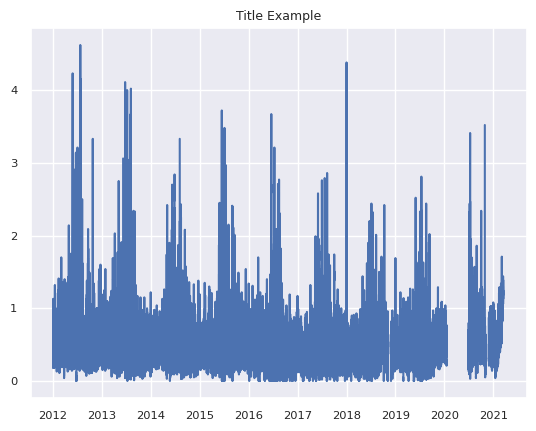

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75) 

plt.plot(dadoarIR['Data'], dadoarIR['CO']);
plt.title('Title Example');

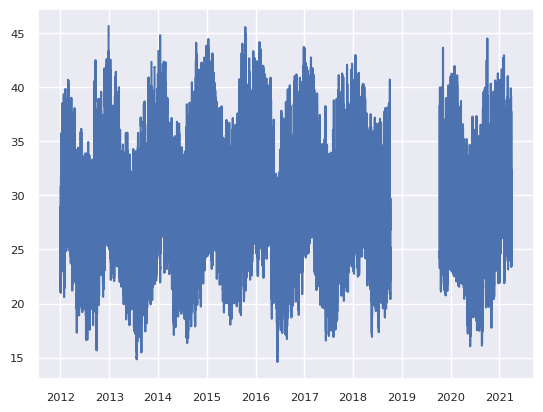

In [ ]:
sns.set_style('darkgrid')
plt.plot(dadoarIR['Data'], dadoarIR['Temperatura']);

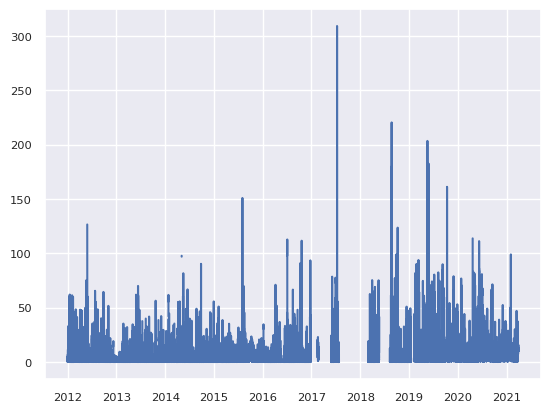

In [ ]:
sns.set_style('darkgrid')
plt.plot(dadoarIR['Data'], dadoarIR['SO2']);

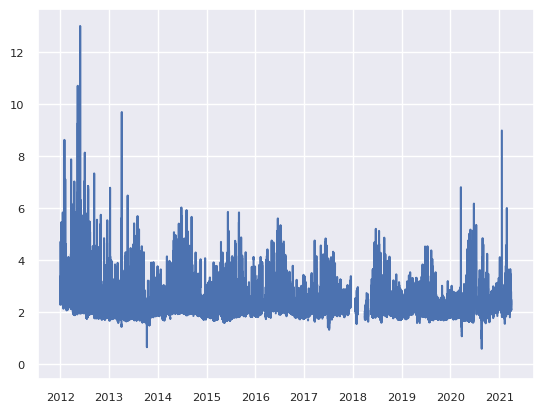

In [ ]:
sns.set_style('darkgrid')
plt.plot(dadoarIR['Data'], dadoarIR['HCT']);

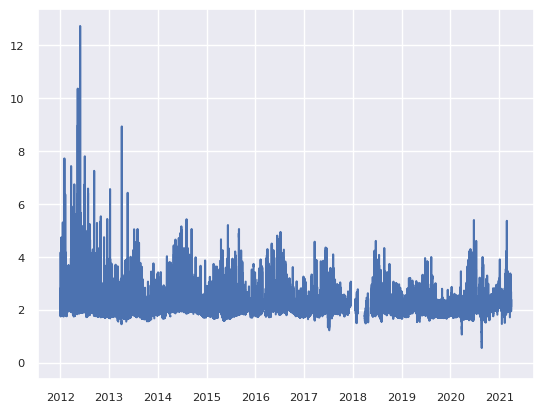

In [ ]:
sns.set_style('darkgrid')
plt.plot(dadoarIR['Data'], dadoarIR['CH4']);

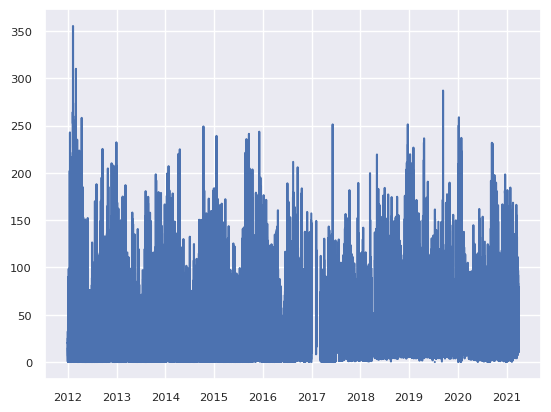

In [ ]:
sns.set_style('darkgrid')
plt.plot(dadoarIR['Data'], dadoarIR['O3']);

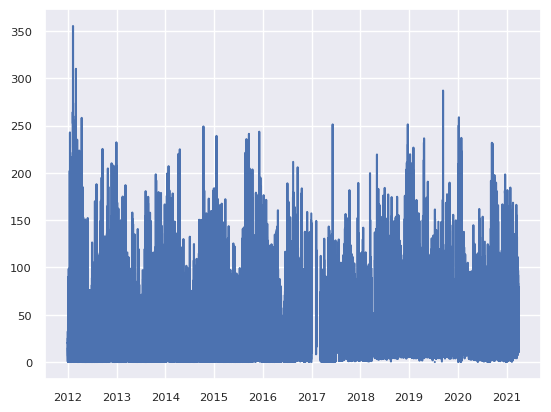

In [ ]:
plt.plot(dadoarIR['Data'], dadoarIR['O3'])

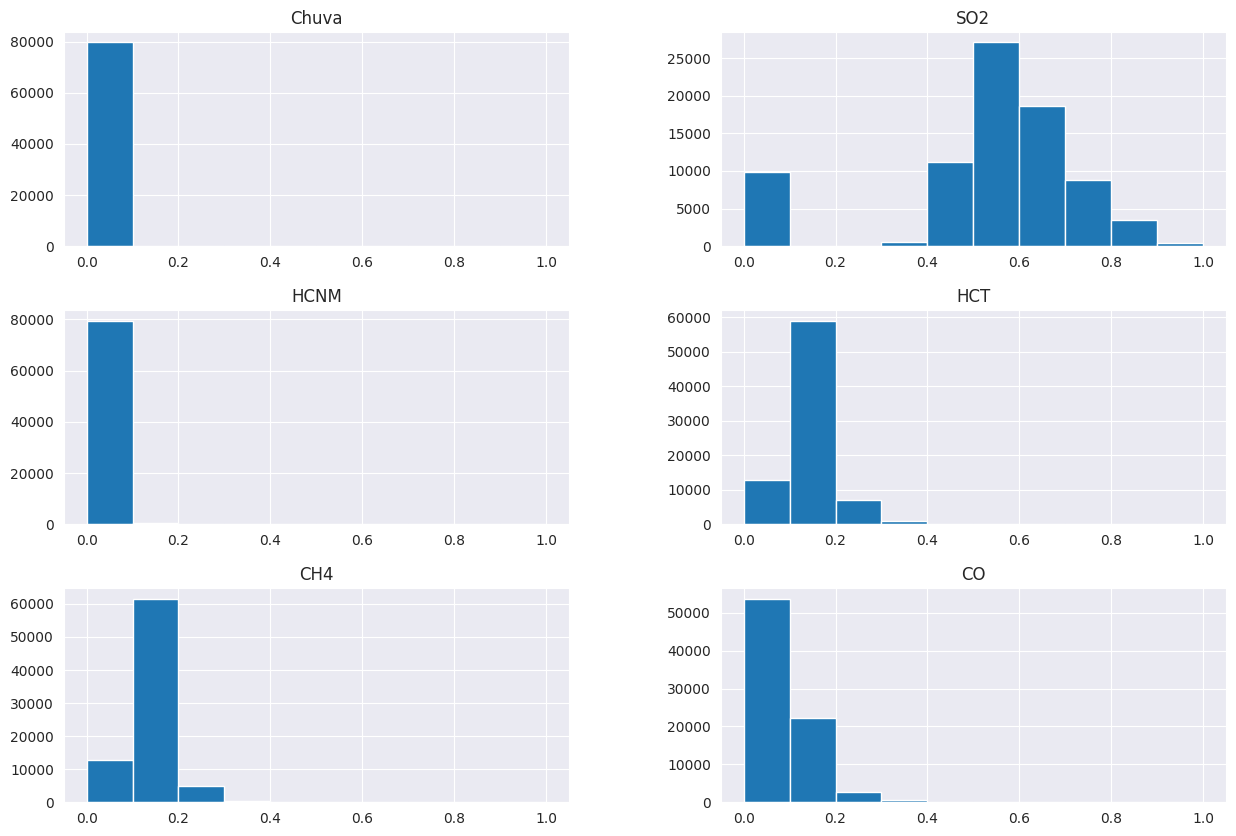

In [ ]:
# Selecionando apenas os atributos que foram normalizados para apresentação em gráficos
#dadoarIR_Normalizado_Graf = dadoarIR_Normalizado[['Chuva','SO2','HCNM','HCT','CH4','CO',]]

sns.set_style('darkgrid')

dadoarIR_Normalizado_Graf.hist(figsize = (15,10))
plt.show()

#datanorm

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

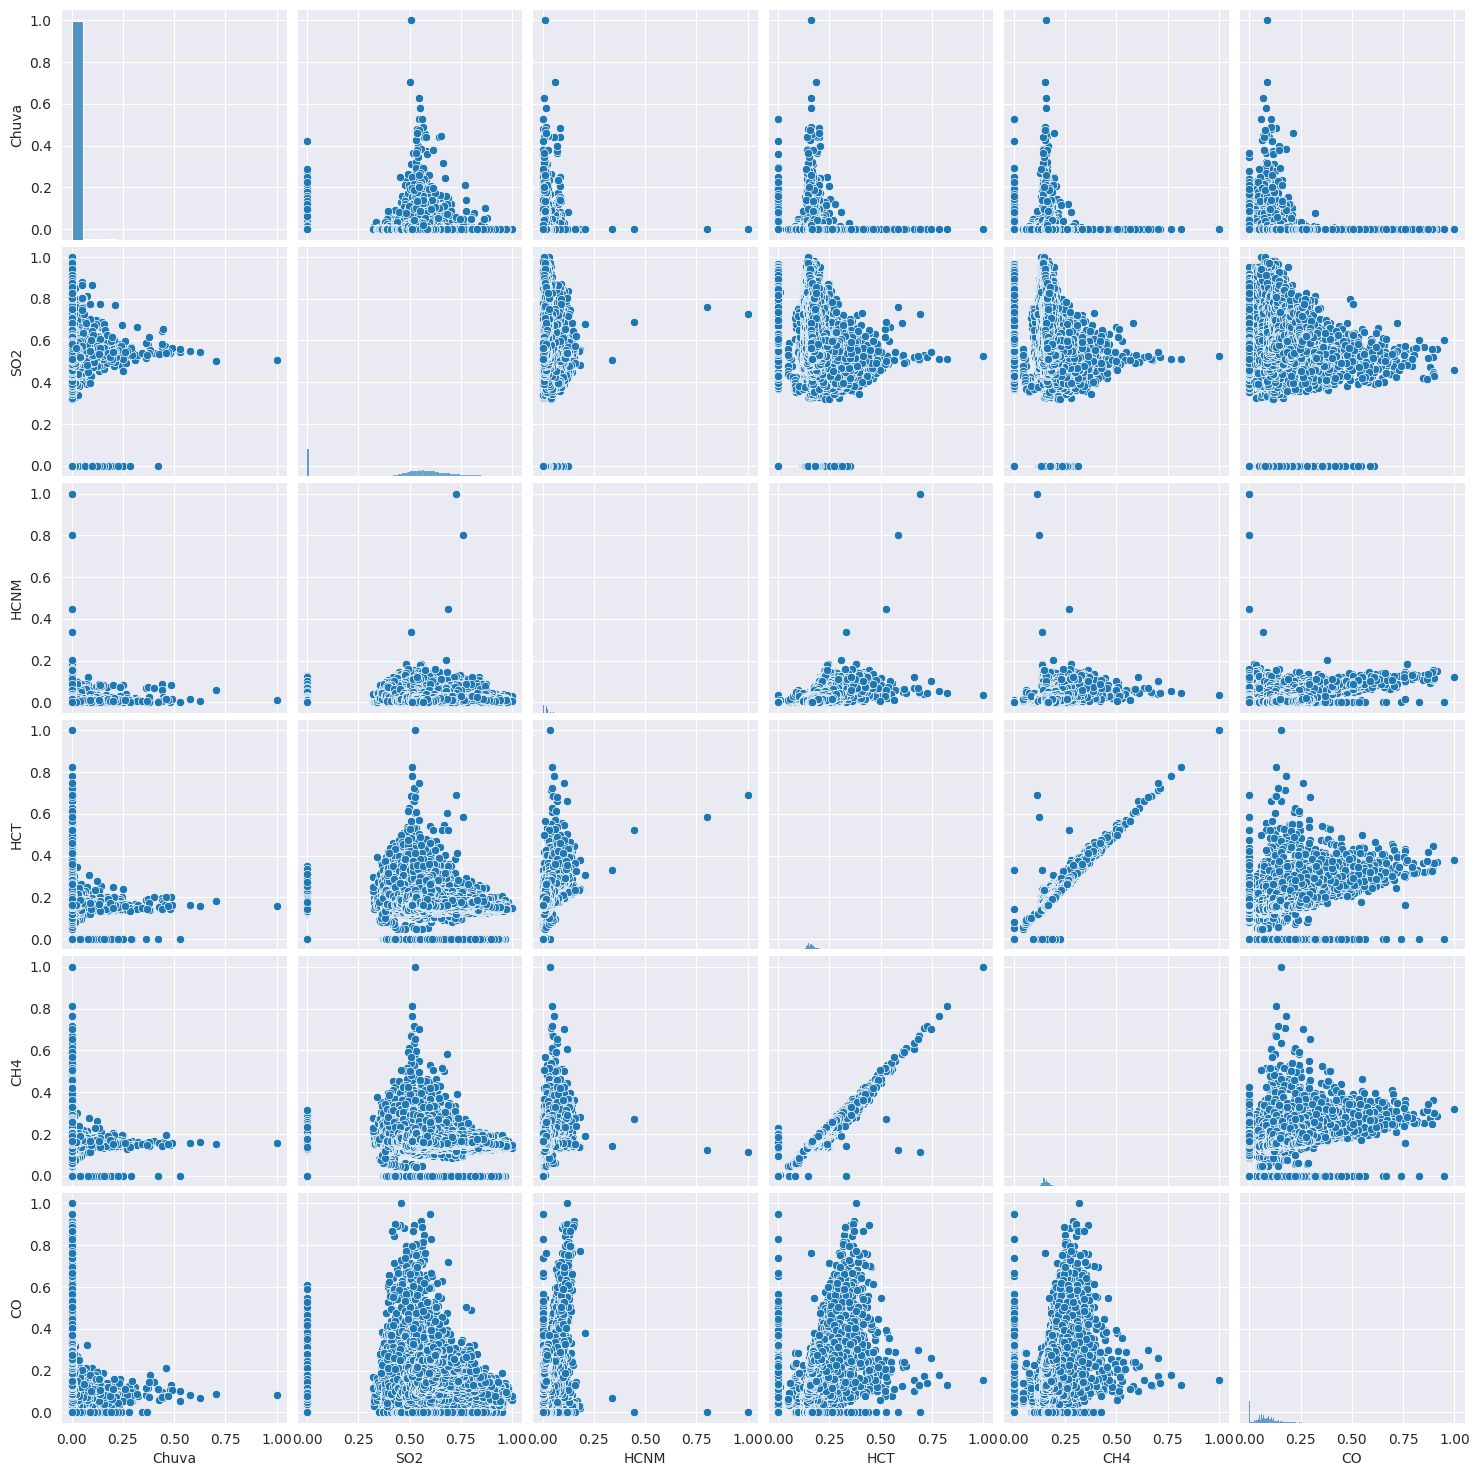

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(dadoarIR_Normalizado_Graf);

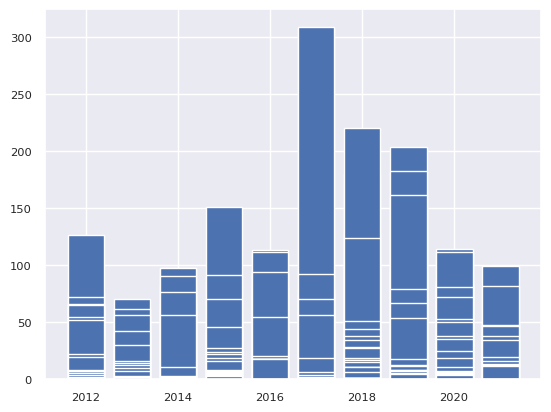

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots()

# Plota o gráfico de barras
ax.bar(x = dadoarIR['Ano'], height = dadoarIR['SO2'])

# Exibe o gráfico
plt.show()

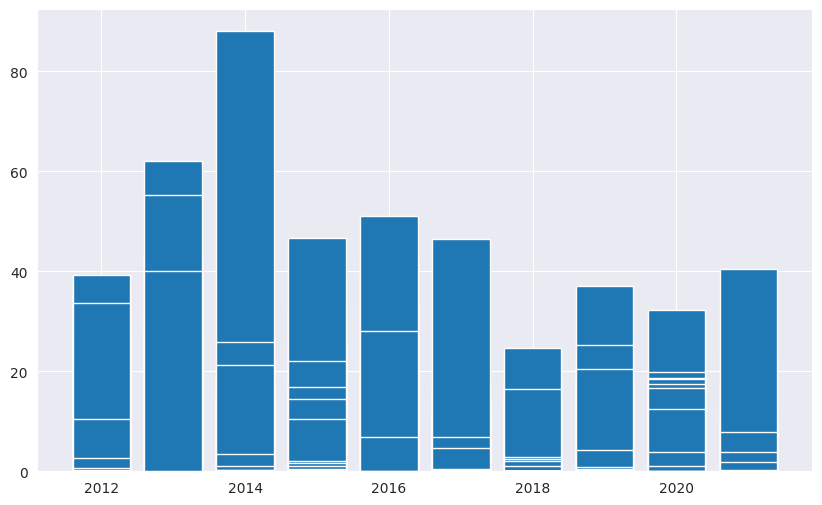

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
ax.bar(x = dadoarIR['Ano'], height = dadoarIR['Chuva'])

# Exibe o gráfico
plt.show()

<ipython-input-85-187fb65a85a7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



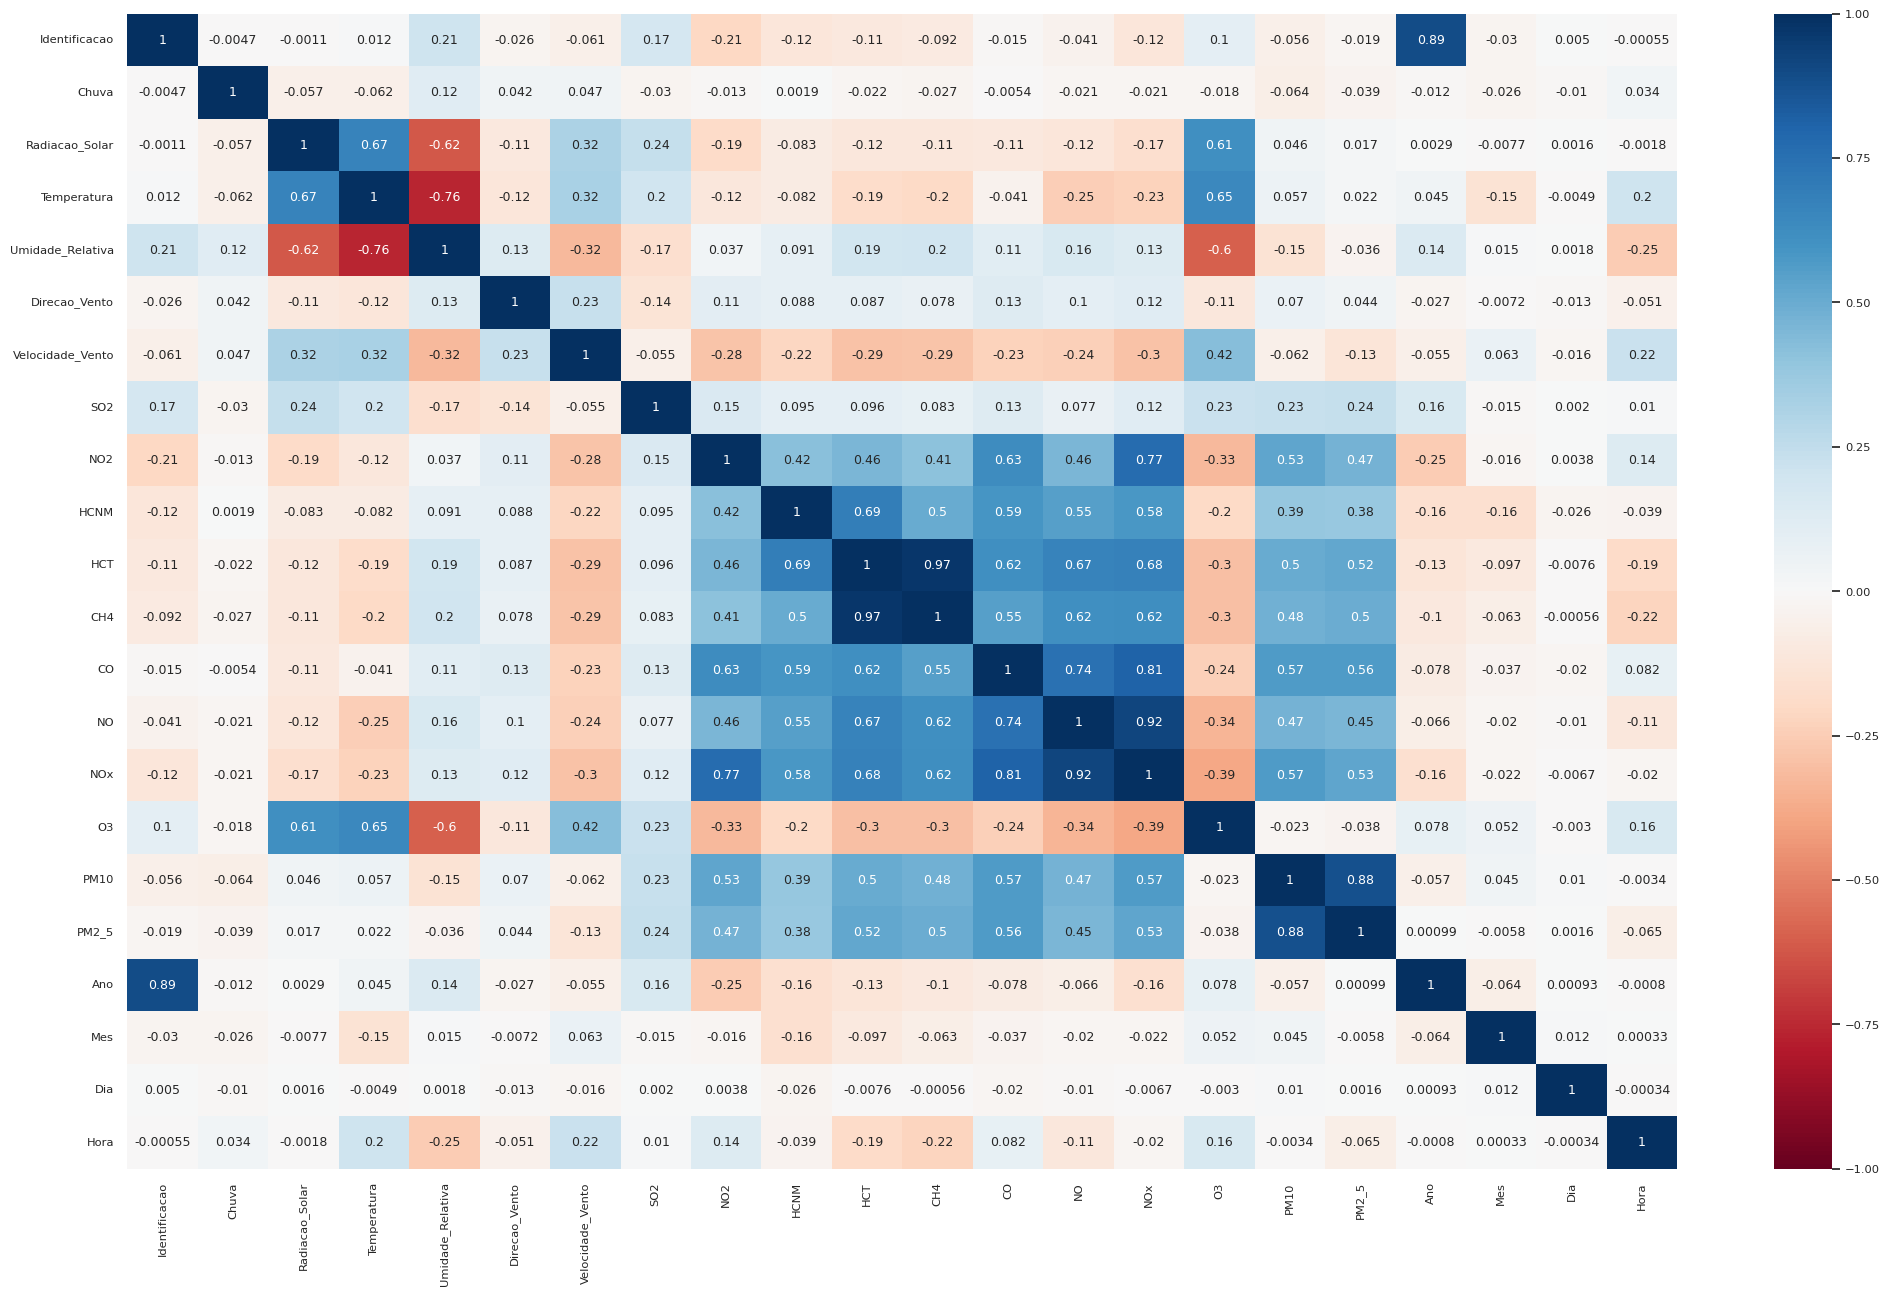

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (25,15));
sns.heatmap(dadoarIR.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

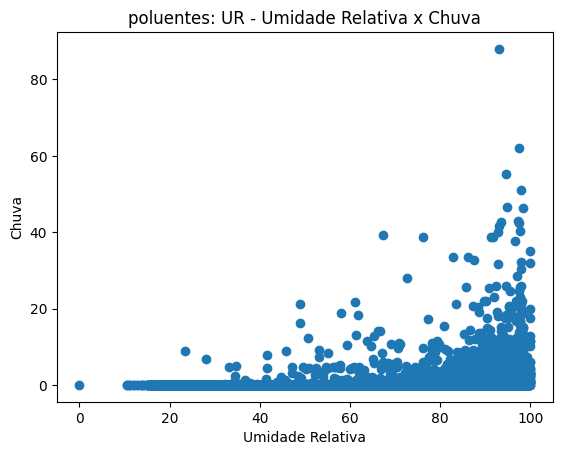

In [ ]:
# plotando o gráfico de Umidade Relativa x Chuva
plt.scatter(dadoarIR['UR'], dadoarIR['Chuva'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('poluentes: UR - Umidade Relativa x Chuva')
plt.xlabel('Umidade Relativa')
plt.ylabel('Chuva');